In [1]:
# install infercnvpy in the anaconda powershell
!pip install infercnvpy

  Created wheel for gtfparse: filename=gtfparse-1.2.1-py3-none-any.whl size=11637 sha256=22fb250596470748cd78dfc707732b9e23d03f3aad81df04cafe1aab3c283668
  Stored in directory: c:\users\kko1\appdata\local\pip\cache\wheels\42\41\84\ad98464a56fd4a362456674f539ed7123205efa0bb432fe9bb
Successfully built gtfparse


In [1]:
#import infercnvpy as cnv
import numpy as np
import pandas as pd
import scanpy as sc
import scanpy.external as sce
import scipy
sc.settings.verbosity = 3
sc.logging.print_header()
sc.set_figure_params(dpi=100, dpi_save=600)
    
import scvelo as scv
scv.settings.verbosity = 3
scv.settings.presenter_view = True
scv.logging.print_versions()


import matplotlib.pyplot as pl
from matplotlib import rcParams

scanpy==1.9.1 anndata==0.9.2 umap==0.5.2 numpy==1.20.0 scipy==1.8.0 pandas==1.4.2 scikit-learn==1.0.2 statsmodels==0.13.2 python-igraph==0.9.9 pynndescent==0.5.6
scvelo==0.2.4  scanpy==1.9.1  anndata==0.9.2  loompy==3.0.7  numpy==1.20.0  scipy==1.8.0  matplotlib==3.4.3  sklearn==1.0.2  pandas==1.4.2  


In [2]:
import seaborn as sns

In [3]:
import scvelo as scv

In [4]:
import os
os.chdir('D:/KP/EKP_RKP')

In [7]:
adata= sc.read('EKP_and_RKP_velocity_overlaid_07-29-24.h5ad')
adata

AnnData object with n_obs × n_vars = 1832 × 20470
    obs: 'batch', 'sample_batch', 'tissue', 'type', 'leiden', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rpl', 'pct_counts_rpl', 'total_counts_rps', 'pct_counts_rps', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts', 'velocity_self_transition', 'root_cells', 'end_points', 'velocity_pseudotime', 'latent_time', 'velocity_length', 'velocity_confidence', 'velocity_confidence_transition', 'scvelo_leiden', 'celltype'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'rpl', 'rps', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mean', 'std'
    uns: 'EKP_RKP_Tumor_rank_fgsea', 'Leiden_Tumor_rank_fgsea', 'celltype_colors', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'tissue_colors', 'type_colors', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap', 'velocity_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distanc

# Add phate information in adata

In [8]:
adata_p= adata
adata_p

AnnData object with n_obs × n_vars = 1832 × 20470
    obs: 'batch', 'sample_batch', 'tissue', 'type', 'leiden', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rpl', 'pct_counts_rpl', 'total_counts_rps', 'pct_counts_rps', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts', 'velocity_self_transition', 'root_cells', 'end_points', 'velocity_pseudotime', 'latent_time', 'velocity_length', 'velocity_confidence', 'velocity_confidence_transition', 'scvelo_leiden', 'celltype'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'rpl', 'rps', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mean', 'std'
    uns: 'EKP_RKP_Tumor_rank_fgsea', 'Leiden_Tumor_rank_fgsea', 'celltype_colors', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'tissue_colors', 'type_colors', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap', 'velocity_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distanc

In [9]:
adata_p.obs['celltype']

AAACCCACAGTATGAA           Zeb2+ cell_1
AAACGAAAGTAGGGTC             Cd63+ cell
AAACGAATCTCGCTTG           Cdk8+ cell_1
AAACGCTAGTGGCGAT    Runx2/Runx3+ cell_1
AAACGCTCATGGAATA          Runx1+ stem_1
                           ...         
TTTGATCCATGACTTG             Eno1+ cell
TTTGGAGGTCTCGCGA             Eno1+ cell
TTTGGAGTCATGGTAC        Hdc/Cd24a+ cell
TTTGTTGCAACAGCCC           Cdk8+ cell_2
TTTGTTGCAGGATTCT       Ptma/Krt18+ cell
Name: celltype, Length: 1832, dtype: category
Categories (19, object): ['Aqp5+ cell', 'Aqp5/Krt18+ cell', 'Aqp9+ cell', 'Cd63+ cell', ..., 'Tgfbr1/Celf2+ prolif', 'Top2a+ prolif', 'Zeb2+ cell_1', 'Zeb2/Runx2/Runx3+ cell']

# Phate values were calculated in R
# This is done after 8_Phate_analysis...R

In [11]:
phate = pd.read_table('D:/KP/EKP_RKP/phate/PHATE.Default.output.meta.txt')
phate

PHATE1    PHATE2  batch sample_batch     tissue type  \
AAACCCACAGTATGAA -0.022671  0.001551      0         -1-0  allograft  EKP   
AAACGAATCTCGCTTG -0.012813  0.009862      0         -1-0  allograft  EKP   
AAACGCTAGTGGCGAT -0.023366 -0.003843      0         -1-0  allograft  EKP   
AAACGCTCATGGAATA -0.019877 -0.013829      0         -1-0  allograft  EKP   
AAAGAACGTACTCGCG -0.020469  0.003017      0         -1-0  allograft  EKP   
...                    ...       ...    ...          ...        ...  ...   
TTTGACTAGGACGGAG -0.018680 -0.006216      1         -1-1  allograft  RKP   
TTTGACTGTCGCTGCA -0.018257 -0.008650      1         -1-1  allograft  RKP   
TTTGATCCATGACTTG  0.002079  0.010600      1         -1-1  allograft  RKP   
TTTGGAGGTCTCGCGA  0.003136  0.009108      1         -1-1  allograft  RKP   
TTTGTTGCAGGATTCT  0.022728  0.004505      1         -1-1  allograft  RKP   

                  leiden  n_genes  n_genes_by_counts  total_counts  ...  \
AAACCCACAGTATGAA       0     3835               3835         16059  ...   
AAACGAATCTCGCTTG       2      656                656          1903  ...   
AAACGCTAGTGGCGAT       0     4898               4898         26809  ...   
AAACGCTCATGGAATA       0     4000               4000         21023  ...   
AAAGAACGTACTCGCG       0     3739               3739         15947  ...   
...                  ...      ...                ...           ...  ...   
TTTGACTAGGACGGAG       0     3833               3833         20288  ...   
TTTGACTGTCGCTGCA       0     4807               4807         27655  ...   
TTTGATCCATGACTTG       2      694                694          1473  ...   
TTTGGAGGTCTCGCGA       2     1346               1346          4412  ...   
TTTGTTGCAGGATTCT       1      406                406          1057  ...   

                  velocity_self_transition    root_cells    end_points  \
AAACCCACAGTATGAA                  0.035713  1.627170e-01  1.438578e-02   
AAACGAATCTCGCTTG                  0.010161  6.179012e-01  3.949440e-01   
AAACGCTAGTGGCGAT                  0.291017  8.648462e-02  5.984261e-03   
AAACGCTCATGGAATA                  0.228161  1.273629e-01  1.728421e-05   
AAAGAACGTACTCGCG                  0.486793  1.819686e-02  8.216390e-03   
...                                    ...           ...           ...   
TTTGACTAGGACGGAG                  0.025429  1.144066e-07  1.184737e-03   
TTTGACTGTCGCTGCA                  0.032758  1.623987e-07  5.240720e-05   
TTTGATCCATGACTTG                  0.650252  1.062666e-03  1.225281e-07   
TTTGGAGGTCTCGCGA                  0.569004  2.785794e-03  6.233914e-08   
TTTGTTGCAGGATTCT                  0.036854  4.091704e-03  6.903732e-02   

                  velocity_pseudotime  latent_time  velocity_length  \
AAACCCACAGTATGAA             0.336311     0.834071           167.25   
AAACGAATCTCGCTTG             0.520379     0.135188           290.87   
AAACGCTAGTGGCGAT             0.340351     0.862483           109.88   
AAACGCTCATGGAATA             0.401556     0.949667           100.40   
AAAGAACGTACTCGCG             0.356933     0.853877           123.90   
...                               ...          ...              ...   
TTTGACTAGGACGGAG             0.668227     0.403718            40.82   
TTTGACTGTCGCTGCA             0.687539     0.507764            35.31   
TTTGATCCATGACTTG             0.644648     0.607413            14.36   
TTTGGAGGTCTCGCGA             0.657289     0.631854            19.05   
TTTGTTGCAGGATTCT             0.815803     0.919478            42.18   

                  velocity_confidence  velocity_confidence_transition  \
AAACCCACAGTATGAA             0.516420                        0.962171   
AAACGAATCTCGCTTG             0.099673                        0.970261   
AAACGCTAGTGGCGAT             0.625648                        0.651285   
AAACGCTCATGGAATA             0.813403                        0.780288   
AAAGAACGTACTCGCG             0.725516                        0.513673   
...                       

In [12]:
filtered_index = phate.index.tolist()
filtered_index

['AAACCCACAGTATGAA',
 'AAACGAATCTCGCTTG',
 'AAACGCTAGTGGCGAT',
 'AAACGCTCATGGAATA',
 'AAAGAACGTACTCGCG',
 'AAAGAACTCCCTTGTG',
 'AAAGTCCCACAAGTGG',
 'AAAGTCCCATCATTTC',
 'AAAGTCCTCTGGAAGG',
 'AAAGTCCTCTTTCAGT',
 'AAAGTGACAGAATCGG',
 'AACAAAGCAGCTTTCC',
 'AACAACCGTTGCTCGG',
 'AACACACCAAGGTCAG',
 'AACCAACGTAGGGAGG',
 'AACCAACTCTATCGGA',
 'AACCCAACACATGTTG',
 'AACGAAACAAGCGAAC',
 'AACGAAACAATGAGCG',
 'AAGACTCCAACCGACC',
 'AAGACTCGTGGTCCCA',
 'AAGCCATGTCCTTTGC',
 'AAGCCATGTGTCCATA',
 'AAGGAATAGCCATGCC',
 'AAGGAATGTCGCATTA',
 'AAGTTCGTCTCAACCC',
 'AATCGACGTCTACGTA',
 'AATCGTGCACTTCATT',
 'AATGACCGTTCAGCGC',
 'AATGACCTCAGCCTTC',
 'AATGGCTTCGTCGGGT',
 'AATTCCTAGCCTCTCT',
 'AATTCCTTCGTAGAGG',
 'AATTTCCCAGCTGCCA',
 'ACAACCAAGGAACTAT',
 'ACAACCATCCATACAG',
 'ACACAGTGTGGTCTGC',
 'ACACAGTTCAGCTGTA',
 'ACACCAAGTGTTAAAG',
 'ACACCAAGTTTCCATT',
 'ACATCCCCACGGTGTC',
 'ACATCGAAGTTCAACC',
 'ACATCGAGTAACGTTC',
 'ACATGCATCGGCTTGG',
 'ACATTTCAGGAACTCG',
 'ACCAAACCATACCACA',
 'ACCAAACGTCGACTGC',
 'ACCAACACAGT

In [13]:
adata_p.obs

batch sample_batch     tissue type leiden  n_genes  \
AAACCCACAGTATGAA     0         -1-0  allograft  EKP      0     3835   
AAACGAAAGTAGGGTC     0         -1-0  allograft  EKP      2      338   
AAACGAATCTCGCTTG     0         -1-0  allograft  EKP      2      656   
AAACGCTAGTGGCGAT     0         -1-0  allograft  EKP      0     4898   
AAACGCTCATGGAATA     0         -1-0  allograft  EKP      0     4000   
...                ...          ...        ...  ...    ...      ...   
TTTGATCCATGACTTG     1         -1-1  allograft  RKP      2      694   
TTTGGAGGTCTCGCGA     1         -1-1  allograft  RKP      2     1346   
TTTGGAGTCATGGTAC     1         -1-1  allograft  RKP      2      294   
TTTGTTGCAACAGCCC     1         -1-1  allograft  RKP      1      236   
TTTGTTGCAGGATTCT     1         -1-1  allograft  RKP      1      406   

                  n_genes_by_counts  total_counts  total_counts_mt  \
AAACCCACAGTATGAA               3835       16059.0           1046.0   
AAACGAAAGTAGGGTC                338        1239.0              1.0   
AAACGAATCTCGCTTG                656        1903.0            570.0   
AAACGCTAGTGGCGAT               4898       26809.0            977.0   
AAACGCTCATGGAATA               4000       21023.0            548.0   
...                             ...           ...              ...   
TTTGATCCATGACTTG                694        1473.0              2.0   
TTTGGAGGTCTCGCGA               1346        4412.0             80.0   
TTTGGAGTCATGGTAC                294         625.0              7.0   
TTTGTTGCAACAGCCC                236         940.0            617.0   
TTTGTTGCAGGATTCT                406        1057.0              2.0   

                  pct_counts_mt  ...  velocity_self_transition  root_cells  \
AAACCCACAGTATGAA       6.513482  ...                  0.035713    0.162717   
AAACGAAAGTAGGGTC       0.080710  ...                  0.175031    0.523211   
AAACGAATCTCGCTTG      29.952705  ...                  0.010161    0.617901   
AAACGCTAGTGGCGAT       3.644298  ...                  0.291017    0.086485   
AAACGCTCATGGAATA       2.606669  ...                  0.228161    0.127363   
...                         ...  ...                       ...         ...   
TTTGATCCATGACTTG       0.135777  ...                  0.650252    0.001063   
TTTGGAGGTCTCGCGA       1.813237  ...                  0.569004    0.002786   
TTTGGAGTCATGGTAC       1.120000  ...                  0.683313    1.000000   
TTTGTTGCAACAGCCC      65.638298  ...                  0.213537    0.001865   
TTTGTTGCAGGATTCT       0.189215  ...                  0.036854    0.004092   

                    end_points  velocity_pseudotime  latent_time  \
AAACCCACAGTATGAA  1.438578e-02             0.336311     0.834071   
AAACGAAAGTAGGGTC  3.769389e-02             0.138676     0.193168   
AAACGAATCTCGCTTG  3.949440e-01             0.520379     0.135188   
AAACGCTAGTGGCGAT  5.984261e-03             0.340351     0.862483   
AAACGCTCATGGAATA  1.728421e-05             0.401556     0.949667   
...                        ...                  ...          ...   
TTTGATCCATGACTTG  1.225281e-07             0.644648     0.607413   
TTTGGAGGTCTCGCGA  6.233914e-08             0.657289     0.631854   
TTTGGAGTCATGGTAC  3.093939e-07             0.064256     0.026485   
TTTGTTGCAACAGCCC  3.037872e-04             0.792318     0.861688   
TTTGTTGCAGGATTCT  6.903732e-02             0.815803     0.919478   

                  velocity_length  velocity_confidence  \
AAACCCACAGTATGAA           167.25             0.516420   
AAACGAAAGTAGGGTC            33.70             0.502832   
AAACGAATCTCGCTTG           290.87             0.099673   
AAACGCTAGTGGCGAT           109.88             0.625648   
AAACGCTCATGGAATA           100.40             0.813403   
...                           ...                  ...   
TTTGATCCATGACTTG            14.36             0.689613   
TTTGGAGGTCTCGCGA            19.05             0.671735   
TTTGGAGTCATGGTAC            22.41             0

In [14]:
filtered_index = [index for index in filtered_index if index in adata_p.obs.index]
print(filtered_index)

['AAACCCACAGTATGAA', 'AAACGAATCTCGCTTG', 'AAACGCTAGTGGCGAT', 'AAACGCTCATGGAATA', 'AAAGAACGTACTCGCG', 'AAAGAACTCCCTTGTG', 'AAAGTCCCACAAGTGG', 'AAAGTCCCATCATTTC', 'AAAGTCCTCTGGAAGG', 'AAAGTCCTCTTTCAGT', 'AAAGTGACAGAATCGG', 'AACAAAGCAGCTTTCC', 'AACAACCGTTGCTCGG', 'AACACACCAAGGTCAG', 'AACCAACGTAGGGAGG', 'AACCAACTCTATCGGA', 'AACCCAACACATGTTG', 'AACGAAACAAGCGAAC', 'AACGAAACAATGAGCG', 'AAGACTCCAACCGACC', 'AAGACTCGTGGTCCCA', 'AAGCCATGTCCTTTGC', 'AAGCCATGTGTCCATA', 'AAGGAATAGCCATGCC', 'AAGGAATGTCGCATTA', 'AAGTTCGTCTCAACCC', 'AATCGACGTCTACGTA', 'AATCGTGCACTTCATT', 'AATGACCGTTCAGCGC', 'AATGACCTCAGCCTTC', 'AATGGCTTCGTCGGGT', 'AATTCCTAGCCTCTCT', 'AATTCCTTCGTAGAGG', 'AATTTCCCAGCTGCCA', 'ACAACCAAGGAACTAT', 'ACAACCATCCATACAG', 'ACACAGTGTGGTCTGC', 'ACACAGTTCAGCTGTA', 'ACACCAAGTGTTAAAG', 'ACACCAAGTTTCCATT', 'ACATCCCCACGGTGTC', 'ACATCGAAGTTCAACC', 'ACATCGAGTAACGTTC', 'ACATGCATCGGCTTGG', 'ACATTTCAGGAACTCG', 'ACCAAACCATACCACA', 'ACCAAACGTCGACTGC', 'ACCAACACAGTTGCGC', 'ACCGTTCAGAAGCGGG', 'ACCGTTCAGCGAACTG',

In [17]:
import anndata as ad

In [18]:
filtered_phate_obs = adata_p.obs.loc[filtered_index]
adata_pf = ad.AnnData(X=adata_p[filtered_index].X, obs=adata_p[filtered_index].obs, 
                      var=adata_p.var, uns=adata_p[filtered_index].uns,
                     obsm= adata_p[filtered_index].obsm, obsp= adata_p[filtered_index].obsp, )
adata_pf

AnnData object with n_obs × n_vars = 1708 × 20470
    obs: 'batch', 'sample_batch', 'tissue', 'type', 'leiden', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rpl', 'pct_counts_rpl', 'total_counts_rps', 'pct_counts_rps', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts', 'velocity_self_transition', 'root_cells', 'end_points', 'velocity_pseudotime', 'latent_time', 'velocity_length', 'velocity_confidence', 'velocity_confidence_transition', 'scvelo_leiden', 'celltype'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'rpl', 'rps', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mean', 'std'
    uns: 'EKP_RKP_Tumor_rank_fgsea', 'Leiden_Tumor_rank_fgsea', 'celltype_colors', 'leiden', 'log1p', 'neighbors', 'pca', 'tissue_colors', 'type_colors', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap', 'velocity_umap'
    obsp: 'connectivities', 'distances'

In [19]:
adata_pf.obs

batch sample_batch     tissue type leiden  n_genes  \
AAACCCACAGTATGAA     0         -1-0  allograft  EKP      0     3835   
AAACGAATCTCGCTTG     0         -1-0  allograft  EKP      2      656   
AAACGCTAGTGGCGAT     0         -1-0  allograft  EKP      0     4898   
AAACGCTCATGGAATA     0         -1-0  allograft  EKP      0     4000   
AAAGAACGTACTCGCG     0         -1-0  allograft  EKP      0     3739   
...                ...          ...        ...  ...    ...      ...   
TTTGACTAGGACGGAG     1         -1-1  allograft  RKP      0     3833   
TTTGACTGTCGCTGCA     1         -1-1  allograft  RKP      0     4807   
TTTGATCCATGACTTG     1         -1-1  allograft  RKP      2      694   
TTTGGAGGTCTCGCGA     1         -1-1  allograft  RKP      2     1346   
TTTGTTGCAGGATTCT     1         -1-1  allograft  RKP      1      406   

                  n_genes_by_counts  total_counts  total_counts_mt  \
AAACCCACAGTATGAA               3835       16059.0           1046.0   
AAACGAATCTCGCTTG                656        1903.0            570.0   
AAACGCTAGTGGCGAT               4898       26809.0            977.0   
AAACGCTCATGGAATA               4000       21023.0            548.0   
AAAGAACGTACTCGCG               3739       15947.0            447.0   
...                             ...           ...              ...   
TTTGACTAGGACGGAG               3833       20288.0            522.0   
TTTGACTGTCGCTGCA               4807       27655.0            375.0   
TTTGATCCATGACTTG                694        1473.0              2.0   
TTTGGAGGTCTCGCGA               1346        4412.0             80.0   
TTTGTTGCAGGATTCT                406        1057.0              2.0   

                  pct_counts_mt  ...  velocity_self_transition    root_cells  \
AAACCCACAGTATGAA       6.513482  ...                  0.035713  1.627170e-01   
AAACGAATCTCGCTTG      29.952705  ...                  0.010161  6.179012e-01   
AAACGCTAGTGGCGAT       3.644298  ...                  0.291017  8.648462e-02   
AAACGCTCATGGAATA       2.606669  ...                  0.228161  1.273629e-01   
AAAGAACGTACTCGCG       2.803035  ...                  0.486793  1.819686e-02   
...                         ...  ...                       ...           ...   
TTTGACTAGGACGGAG       2.572950  ...                  0.025429  1.144066e-07   
TTTGACTGTCGCTGCA       1.355994  ...                  0.032758  1.623987e-07   
TTTGATCCATGACTTG       0.135777  ...                  0.650252  1.062666e-03   
TTTGGAGGTCTCGCGA       1.813237  ...                  0.569004  2.785794e-03   
TTTGTTGCAGGATTCT       0.189215  ...                  0.036854  4.091704e-03   

                    end_points  velocity_pseudotime  latent_time  \
AAACCCACAGTATGAA  1.438578e-02             0.336311     0.834071   
AAACGAATCTCGCTTG  3.949440e-01             0.520379     0.135188   
AAACGCTAGTGGCGAT  5.984261e-03             0.340351     0.862483   
AAACGCTCATGGAATA  1.728421e-05             0.401556     0.949667   
AAAGAACGTACTCGCG  8.216390e-03             0.356933     0.853877   
...                        ...                  ...          ...   
TTTGACTAGGACGGAG  1.184737e-03             0.668227     0.403718   
TTTGACTGTCGCTGCA  5.240720e-05             0.687539     0.507764   
TTTGATCCATGACTTG  1.225281e-07             0.644648     0.607413   
TTTGGAGGTCTCGCGA  6.233914e-08             0.657289     0.631854   
TTTGTTGCAGGATTCT  6.903732e-02             0.815803     0.919478   

                  velocity_length  velocity_confidence  \
AAACCCACAGTATGAA           167.25             0.516420   
AAACGAATCTCGCTTG           290.87             0.099673   
AAACGCTAGTGGCGAT           109.88             0.625648   
AAACGCTCATGGAATA           100.40             0.813403   
AAAGAACGTACTCGCG           123.90             0.725516   
...                           ...                  ...   
TTTGACTAGGACGGAG            40.82             0.978166   
TTTGACTGTCGCTGCA            35.31             0.983380   
TTTGATCCATGACTTG       

In [20]:
adata_pf.obs['Phate1']= phate['PHATE1']
adata_pf.obs['Phate2']= phate['PHATE2']

In [21]:
adata_pf.obs

batch sample_batch     tissue type leiden  n_genes  \
AAACCCACAGTATGAA     0         -1-0  allograft  EKP      0     3835   
AAACGAATCTCGCTTG     0         -1-0  allograft  EKP      2      656   
AAACGCTAGTGGCGAT     0         -1-0  allograft  EKP      0     4898   
AAACGCTCATGGAATA     0         -1-0  allograft  EKP      0     4000   
AAAGAACGTACTCGCG     0         -1-0  allograft  EKP      0     3739   
...                ...          ...        ...  ...    ...      ...   
TTTGACTAGGACGGAG     1         -1-1  allograft  RKP      0     3833   
TTTGACTGTCGCTGCA     1         -1-1  allograft  RKP      0     4807   
TTTGATCCATGACTTG     1         -1-1  allograft  RKP      2      694   
TTTGGAGGTCTCGCGA     1         -1-1  allograft  RKP      2     1346   
TTTGTTGCAGGATTCT     1         -1-1  allograft  RKP      1      406   

                  n_genes_by_counts  total_counts  total_counts_mt  \
AAACCCACAGTATGAA               3835       16059.0           1046.0   
AAACGAATCTCGCTTG                656        1903.0            570.0   
AAACGCTAGTGGCGAT               4898       26809.0            977.0   
AAACGCTCATGGAATA               4000       21023.0            548.0   
AAAGAACGTACTCGCG               3739       15947.0            447.0   
...                             ...           ...              ...   
TTTGACTAGGACGGAG               3833       20288.0            522.0   
TTTGACTGTCGCTGCA               4807       27655.0            375.0   
TTTGATCCATGACTTG                694        1473.0              2.0   
TTTGGAGGTCTCGCGA               1346        4412.0             80.0   
TTTGTTGCAGGATTCT                406        1057.0              2.0   

                  pct_counts_mt  ...    end_points  velocity_pseudotime  \
AAACCCACAGTATGAA       6.513482  ...  1.438578e-02             0.336311   
AAACGAATCTCGCTTG      29.952705  ...  3.949440e-01             0.520379   
AAACGCTAGTGGCGAT       3.644298  ...  5.984261e-03             0.340351   
AAACGCTCATGGAATA       2.606669  ...  1.728421e-05             0.401556   
AAAGAACGTACTCGCG       2.803035  ...  8.216390e-03             0.356933   
...                         ...  ...           ...                  ...   
TTTGACTAGGACGGAG       2.572950  ...  1.184737e-03             0.668227   
TTTGACTGTCGCTGCA       1.355994  ...  5.240720e-05             0.687539   
TTTGATCCATGACTTG       0.135777  ...  1.225281e-07             0.644648   
TTTGGAGGTCTCGCGA       1.813237  ...  6.233914e-08             0.657289   
TTTGTTGCAGGATTCT       0.189215  ...  6.903732e-02             0.815803   

                  latent_time  velocity_length  velocity_confidence  \
AAACCCACAGTATGAA     0.834071           167.25             0.516420   
AAACGAATCTCGCTTG     0.135188           290.87             0.099673   
AAACGCTAGTGGCGAT     0.862483           109.88             0.625648   
AAACGCTCATGGAATA     0.949667           100.40             0.813403   
AAAGAACGTACTCGCG     0.853877           123.90             0.725516   
...                       ...              ...                  ...   
TTTGACTAGGACGGAG     0.403718            40.82             0.978166   
TTTGACTGTCGCTGCA     0.507764            35.31             0.983380   
TTTGATCCATGACTTG     0.607413            14.36             0.689613   
TTTGGAGGTCTCGCGA     0.631854            19.05             0.671735   
TTTGTTGCAGGATTCT     0.919478            42.18             0.856823   

                  velocity_confidence_transition  scvelo_leiden  \
AAACCCACAGTATGAA                        0.962171              0   
AAACGAATCTCGCTTG                        0.970261              4   
AAACGCTAGTGGCGAT                        0.651285              1   
AAACGCTCATGGAATA                        0.780288              2   
AAAGAACGTACTCGCG                        0.513673              0   
...                                          ...            ...   
TTTGACTAGGACGGAG                        0.936110              5   
TTTGACTGTCGCTGCA                 

In [22]:
adata_pf

AnnData object with n_obs × n_vars = 1708 × 20470
    obs: 'batch', 'sample_batch', 'tissue', 'type', 'leiden', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rpl', 'pct_counts_rpl', 'total_counts_rps', 'pct_counts_rps', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts', 'velocity_self_transition', 'root_cells', 'end_points', 'velocity_pseudotime', 'latent_time', 'velocity_length', 'velocity_confidence', 'velocity_confidence_transition', 'scvelo_leiden', 'celltype', 'Phate1', 'Phate2'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'rpl', 'rps', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mean', 'std'
    uns: 'EKP_RKP_Tumor_rank_fgsea', 'Leiden_Tumor_rank_fgsea', 'celltype_colors', 'leiden', 'log1p', 'neighbors', 'pca', 'tissue_colors', 'type_colors', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap', 'velocity_umap'
    obsp: 'connectivities', 'distances'

In [23]:
adata_pf.obs['celltype']

AAACCCACAGTATGAA              Zeb2+ cell_1
AAACGAATCTCGCTTG              Cdk8+ cell_1
AAACGCTAGTGGCGAT       Runx2/Runx3+ cell_1
AAACGCTCATGGAATA             Runx1+ stem_1
AAAGAACGTACTCGCG              Zeb2+ cell_1
                             ...          
TTTGACTAGGACGGAG    Zeb2/Runx2/Runx3+ cell
TTTGACTGTCGCTGCA       Runx2/Runx3+ cell_2
TTTGATCCATGACTTG                Eno1+ cell
TTTGGAGGTCTCGCGA                Eno1+ cell
TTTGTTGCAGGATTCT          Ptma/Krt18+ cell
Name: celltype, Length: 1708, dtype: category
Categories (19, object): ['Aqp5+ cell', 'Aqp5/Krt18+ cell', 'Aqp9+ cell', 'Cd63+ cell', ..., 'Tgfbr1/Celf2+ prolif', 'Top2a+ prolif', 'Zeb2+ cell_1', 'Zeb2/Runx2/Runx3+ cell']

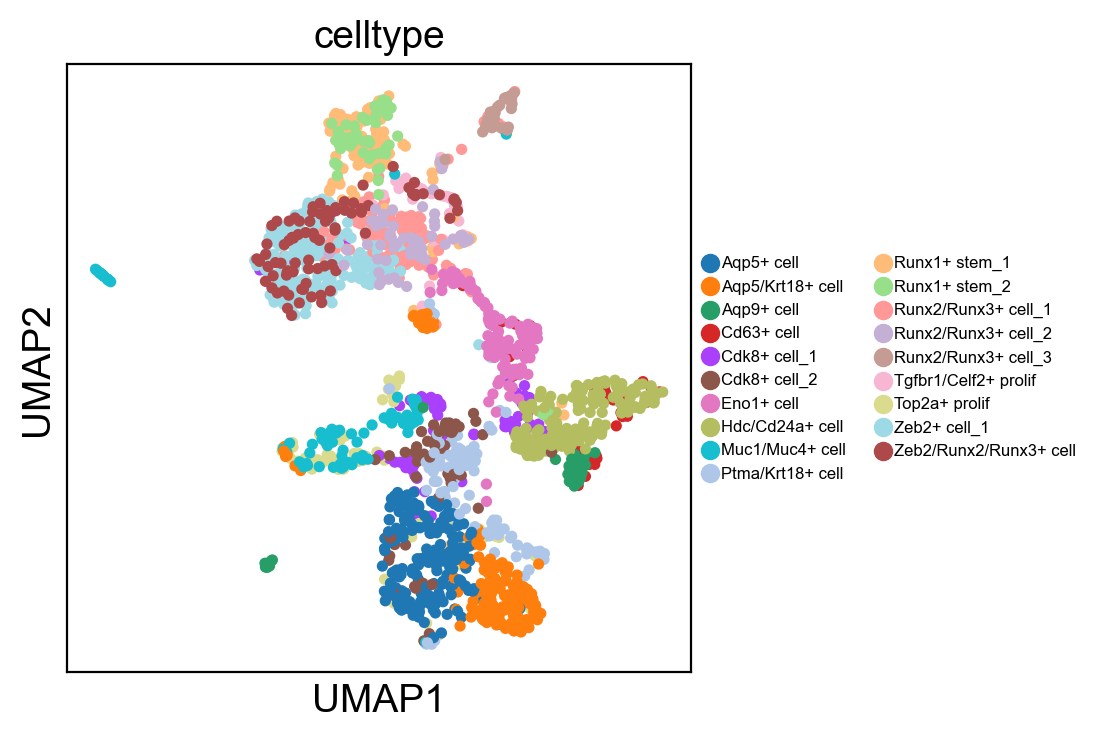

In [25]:
sc.pl.umap(adata, color=['celltype'], legend_loc='right margin', legend_fontsize=6)

In [26]:
adata_pf.uns['phate'] = adata_pf.uns['umap']

In [27]:
adata_pf.uns['phate']

{'params': {'a': 0.5830300198678042, 'b': 1.3341669929396847}}

In [28]:
adata_pf.uns['umap']

{'params': {'a': 0.5830300198678042, 'b': 1.3341669929396847}}

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("ticks")

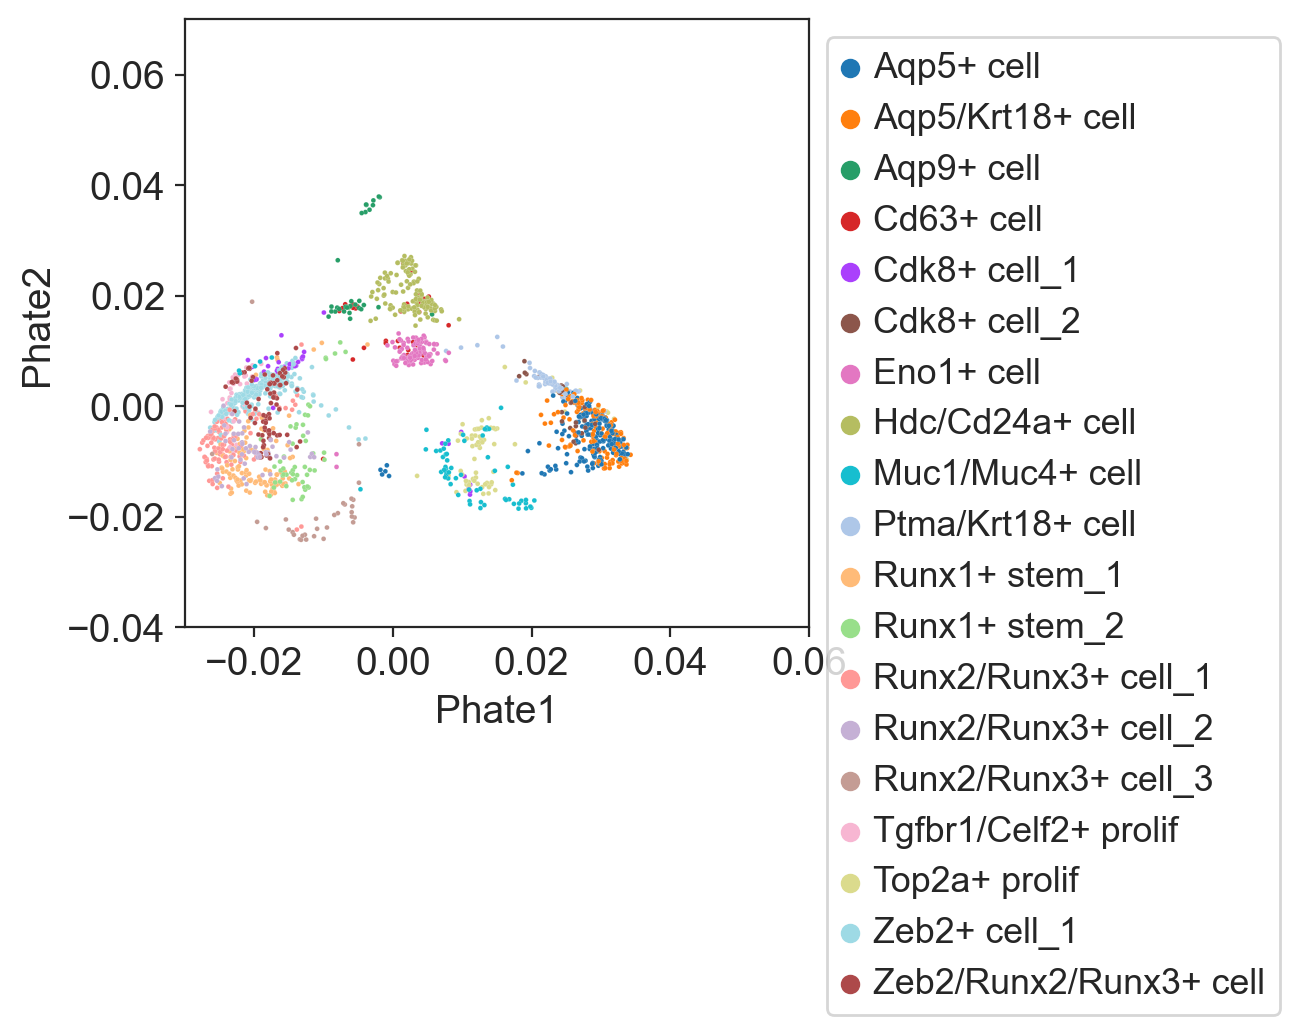

In [73]:
p1 = sns.scatterplot(adata_pf.obs['Phate1'], adata_pf.obs['Phate2'], hue=adata_pf.obs['celltype'], s=3, linewidth=0.05)
plt.legend(bbox_to_anchor=(1,1))
plt.xlim(-0.03, 0.06)
plt.ylim(-0.04, 0.07)
plt.savefig('Phate_map_by_tissue_07-31-24.pdf')

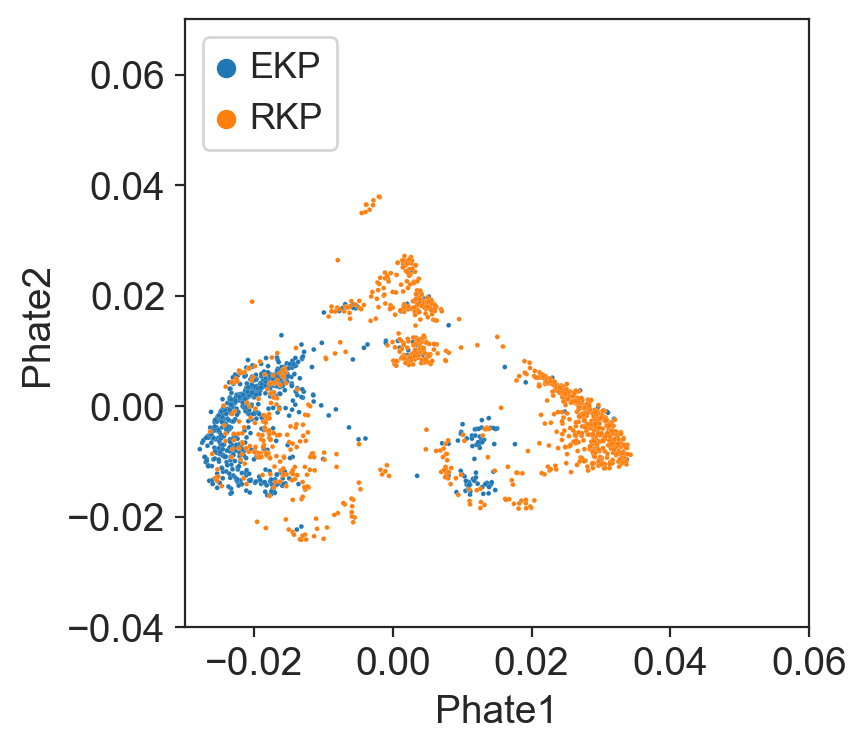

In [32]:
p1 = sns.scatterplot(adata_pf.obs['Phate1'], adata_pf.obs['Phate2'], hue=adata_pf.obs['type'], s=3, linewidth=0.05)
plt.legend(loc='upper left')
plt.xlim(-0.03, 0.06)
plt.ylim(-0.04, 0.07)
plt.savefig('Phate_map_by_type_07-31-24.pdf')

# Rank genes for fgsea

In [34]:
adata.uns['log1p']["base"] = None
sc.tl.rank_genes_groups(adata, groupby='celltype', method='wilcoxon', use_raw=True,  key_added = "celltype_rank")
result = adata.uns['celltype_rank']
groups = result['names'].dtype.names
pd.DataFrame(
    {group + '_' + key[:5]: result[key][group]
    for group in groups for key in ['names', 'scores','pvals']}).to_csv("D:/KP/EKP_RKP/DEG_by_celltype.csv")
# logFC becomes negative or disappear when use_raw=False, could be Scanpy bug


ranking genes
    finished: added to `.uns['celltype_rank']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:05)


In [97]:
adata_sub.uns['log1p']["base"] = None
sc.tl.rank_genes_groups(adata, groupby='celltype', method='wilcoxon', use_raw=True,  key_added = "celltype_sub_rank")
result = adata.uns['celltype_sub_rank']
groups = result['names'].dtype.names
pd.DataFrame(
    {group + '_' + key[:5]: result[key][group]
    for group in groups for key in ['names', 'scores','pvals']}).to_csv("D:/KP/EKP_RKP/DEG_by_celltype_in_two_cell_lineage.csv")
# logFC becomes negative or disappear when use_raw=False, could be Scanpy bug


ranking genes
    finished: added to `.uns['celltype_sub_rank']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:05)


# added later to check Yap1 expression

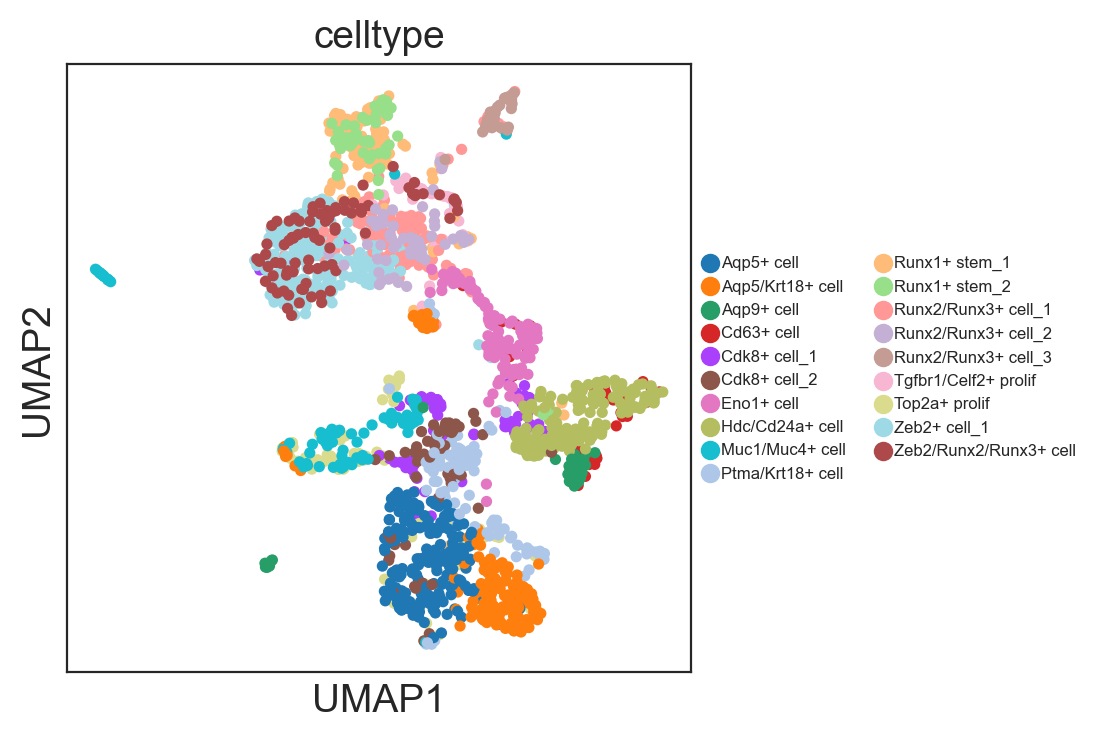

In [35]:
sc.pl.umap(adata, color=['celltype'], legend_loc='right margin', legend_fontsize=6)

In [36]:
adata_sub = adata[adata.obs['celltype'].isin(['Aqp5+ cell','Aqp5/Krt18+ cell','Muc1/Muc4+ cell',
                                              'Runx1+ stem_1','Runx2/Runx3+ cell_1','Zeb2+ cell_1'])]

In [52]:
adata_sub.obs['celltype']

AAACCCACAGTATGAA           Zeb2+ cell_1
AAACGCTAGTGGCGAT    Runx2/Runx3+ cell_1
AAACGCTCATGGAATA          Runx1+ stem_1
AAAGAACGTACTCGCG           Zeb2+ cell_1
AAAGTCCCATCATTTC          Runx1+ stem_1
                           ...         
TTTACGTTCACAGAGG             Aqp5+ cell
TTTAGTCGTCCATACA             Aqp5+ cell
TTTCACAAGCGTGTTT             Aqp5+ cell
TTTCACAGTACTGGGA       Aqp5/Krt18+ cell
TTTCATGCAACCTATG       Aqp5/Krt18+ cell
Name: celltype, Length: 911, dtype: category
Categories (6, object): ['Aqp5+ cell', 'Aqp5/Krt18+ cell', 'Muc1/Muc4+ cell', 'Runx1+ stem_1', 'Runx2/Runx3+ cell_1', 'Zeb2+ cell_1']

In [53]:
adata_sub.obs['celltype'].cat.reorder_categories(['Aqp5/Krt18+ cell', 'Aqp5+ cell', 'Muc1/Muc4+ cell','Runx1+ stem_1', 'Runx2/Runx3+ cell_1','Zeb2+ cell_1'], inplace = True)

In [39]:
sc.tl.rank_genes_groups(adata_sub, 'type', method='t-test')

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


In [41]:
result_T_ekprkp = adata_sub.uns['rank_genes_groups']
groups_T_ekprkp = result_T_ekprkp['names'].dtype.names
pval_table_T_ekprkp = pd.DataFrame(
            {group + '_' + key[:2]: result_T_ekprkp[key][group]
            for group in groups_T_ekprkp for key in ['names', 'pvals_adj']})
pval_table_T_ekprkp

EKP_na         EKP_pv   RKP_na         RKP_pv
0       Fcer1g   0.000000e+00    Cmss1   0.000000e+00
1         Lcp1   0.000000e+00     Gphn  1.786037e-292
2       Laptm5   0.000000e+00  Gm42418  1.334204e-286
3         Srgn   0.000000e+00    Lars2  1.280935e-258
4       Fcgr2b  3.055636e-256  Gm19951  2.589644e-206
...        ...            ...      ...            ...
20465  Gm19951  2.589644e-206   Fcgr2b  3.055636e-256
20466    Lars2  1.280935e-258     Srgn   0.000000e+00
20467  Gm42418  1.334204e-286   Laptm5   0.000000e+00
20468     Gphn  1.786037e-292     Lcp1   0.000000e+00
20469    Cmss1   0.000000e+00   Fcer1g   0.000000e+00

[20470 rows x 4 columns]

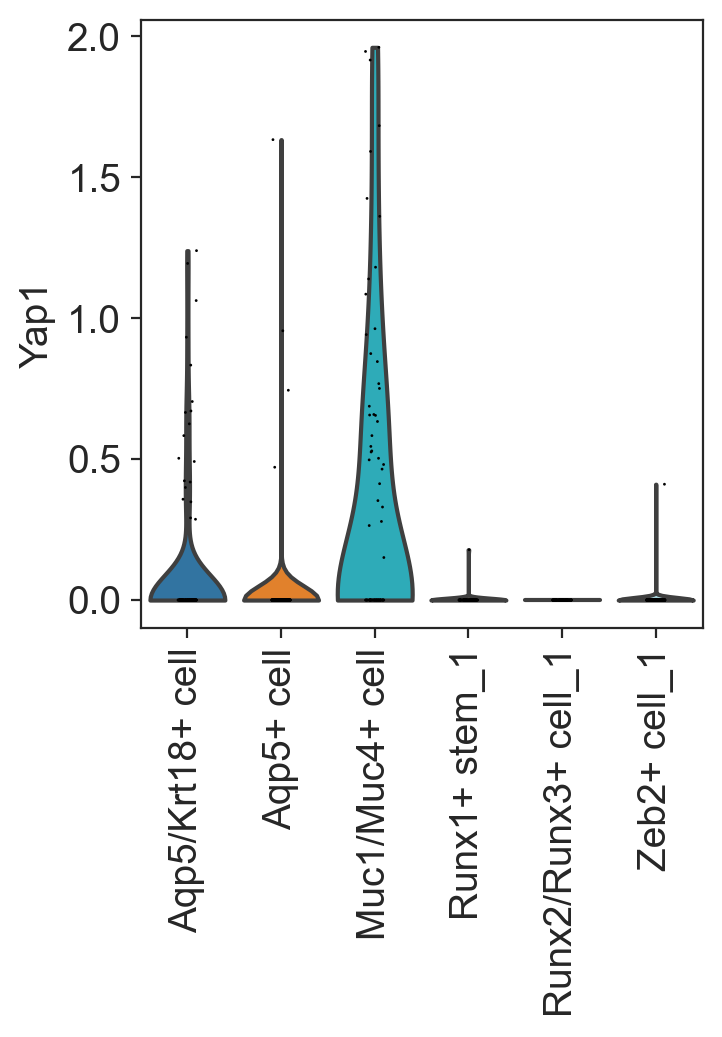

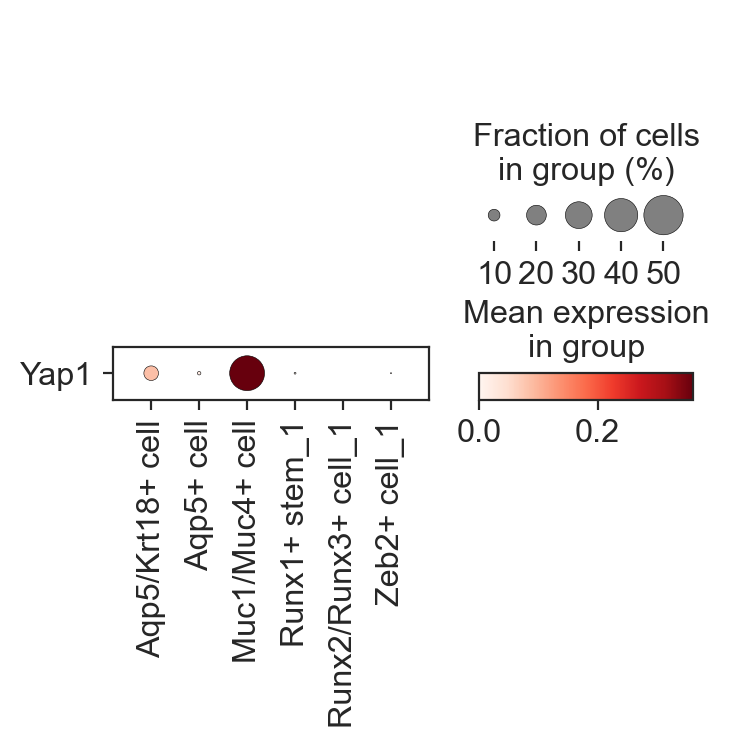

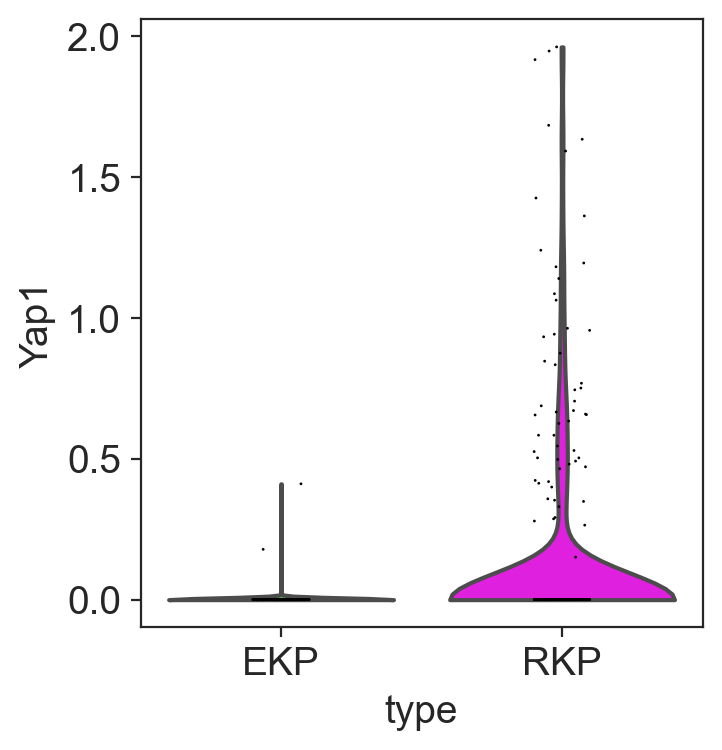

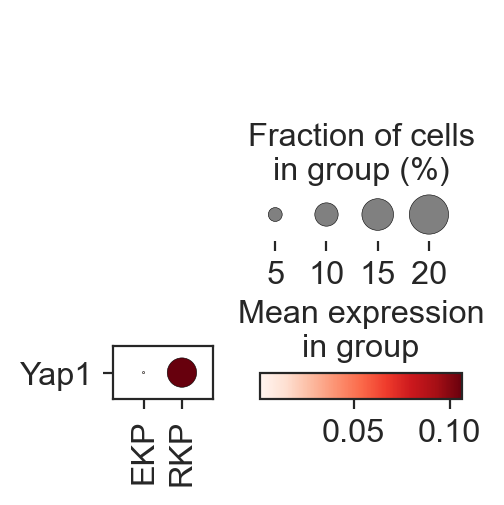

In [62]:
sc.pl.violin(adata_sub, ['Yap1'], groupby='celltype', swap_axes=False, rotation=90, save='_Yap1_in_Runx1_and_Aqp5_cell_lineage_by_celltype.png')
sc.pl.dotplot(adata_sub, ['Yap1'], groupby='celltype', swap_axes=True, save='_Yap1_in_Runx1_and_Aqp5_cell_lineage_by_celltype.pdf')

sc.pl.violin(adata_sub, ['Yap1'], groupby='type', swap_axes=False, save='_Yap1_in_Runx1_and_Aqp5_cell_lineage_by_type.png')
sc.pl.dotplot(adata_sub, ['Yap1'], groupby='type', swap_axes=True, save='_Yap1_in_Runx1_and_Aqp5_cell_lineage_by_type.pdf')

In [43]:
pval_table_T_ekprkp.loc[pval_table_T_ekprkp['RKP_na'].isin(['Yap1'])]

EKP_na        EKP_pv RKP_na        RKP_pv
723   Clk4  4.618610e-64   Yap1  1.024497e-10

# Score analysis

In [68]:
#KEGG_WNT_SIGNALING_PATHWAY
Wnt_genes= ["Apc",	"Apc2",	"Axin1",	"Axin2",	"Btrc",	"Cacybp",	"Camk2a",	"Camk2b",	"Camk2d",	"Camk2g",	"Ccnd1",	"Ccnd2",	"Ccnd3",	"Cer1",	"Chd8",	"Chp1",	"Chp2",	"Crebbp",	"Csnk1a1",	"Csnk1a1",	"Csnk1e",	"Csnk2a1",	"Csnk2a2",	"Csnk2b",	"Ctbp1",	"Ctbp2",	"Ctnnb1",	"Ctnnbip1",	"Cul1",	"Cxxc4",	"Daam1",	"Daam2",	"Dkk1",	"Dkk2",	"Dkk4",	"Dvl1",	"Dvl2",	"Dvl3",	"Ep300",	"Fbxw11",	"Fosl1",	"Peg12",	"Frat2",	"Fzd1",	"Fzd10",	"Fzd2",	"Fzd3",	"Fzd4",	"Fzd5",	"Fzd6",	"Fzd7",	"Fzd8",	"Fzd9",	"Gsk3b",	"Jun",	"Lef1",	"Lrp5",	"Lrp6",	"Map3k7",	"Mapk10",	"Mapk8",	"Mapk9",	"Mmp7",	"Myc",	"Nfat5",	"Nfatc1",	"Nfatc2",	"Nfatc3",	"Nfatc4",	"Nkd1",	"Nkd2",	"Nlk",	"Plcb1",	"Plcb2",	"Plcb3",	"Plcb4",	"Porcn",	"Ppard",	"Ppp2ca",	"Ppp2cb",	"Ppp2r1a",	"Ppp2r1b",	"Ppp2r5a",	"Ppp2r5b",	"Ppp2r5c",	"Ppp2r5d",	"Ppp2r5e",	"Ppp3ca",	"Ppp3cb",	"Ppp3cc",	"Ppp3r1",	"Ppp3r2",	"Prickle1",	"Prickle2",	"Prkaca",	"Prkacb",	"Prkaca",	"Prkca",	"Prkcb",	"Prkcg",	"Prkx",	"Psen1",	"Rac1",	"Rac2",	"Rac3",	"Rbx1",	"Rhoa",	"Rock1",	"Rock2",	"Ruvbl1",	"Senp2",	"Sfrp1",	"Sfrp2",	"Sfrp4",	"Sfrp5",	"Siah1a",	"Skp1",	"Smad2",	"Smad3",	"Smad4",	"Sox17",	"Tbl1x",	"Tbl1xr1",	"Tbl1x",	"Tcf7",	"Tcf7l1",	"Tcf7l2",	"Trp53",	"Vangl1",	"Vangl2",	"Wif1",	"Wnt1",	"Wnt10a",	"Wnt10b",	"Wnt11",	"Wnt16",	"Wnt2",	"Wnt2b",	"Wnt3",	"Wnt3a",	"Wnt4",	"Wnt5a",	"Wnt5b",	"Wnt6",	"Wnt7a",	"Wnt7b",	"Wnt8a",	"Wnt8b",	"Wnt9a",	"Wnt9b"]
#GOBP_HIPPO_SIGNALING_PATHWAY
Hippo_genes= ["Ajuba",	"Amot",	"Amotl1",	"Amotl2",	"Cit",	"Dchs1",	"Dlg5",	"Fat4",	"Schip1",	"Lats1",	"Lats2",	"Limd1",	"Map2k3",	"Mapk14",	"Mark3",	"Mob1a",	"Mob1b",	"Mob3b",	"Nek8",	"Nf2",	"Pja2",	"Sav1",	"Schip1",	"Shank2",	"Sox11",	"Stk3",	"Stk4",	"Tead1",	"Tead2",	"Tead3",	"Tead4",	"Tial1",	"Vgll4",	"Wtip",	"Wwc1",	"Wwc2",	"Wwtr1",	"Yap1"]
#GOBP_CANONICAL_WNT_SIGNALING_PATHWAY
GOBP_Wnt_genes=["Adgra2",	"Amer1",	"Amer2",	"Amer3",	"Amfr",	"Ankrd6",	"Apc",	"Apc2",	"Apoe",	"Arntl",	"Aspm",	"Atp6ap2",	"Axin1",	"Axin2",	"Bambi",	"Bcl9",	"Bcl9l",	"Bicc1",	"Bmp2",	"Btrc",	"Caprin2",	"Cav1",	"Cby1",	"Ccar2",	"Ccdc88c",	"Ccny",	"Ccnyl1",	"Cdh2",	"Cdh3",	"Cdk14",	"Chd8",	"Col1a1",	"Csnk1a1",	"Csnk1a1",	"Csnk1d",	"Csnk1e",	"Csnk1g1",	"Csnk1g2",	"Csnk1g3",	"Ctdnep1",	"Cthrc1",	"Ctnnb1",	"Ctnnbip1",	"Ctnnd1",	"Ctnnd2",	"Cyld",	"Daam2",	"Dab2",	"Dab2ip",	"Dact1",	"Dact3",	"Dapk3",	"Ddit3",	"Ddx3x",	"Disc1",	"Dixdc1",	"Dkk1",	"Dkk2",	"Dkk3",	"Dkk4",	"Dkkl1",	"Dlx5",	"Draxin",	"Dvl1",	"Dvl2",	"Dvl3",	"Eda",	"Edn1",	"Ednra",	"Ednrb",	"Egf",	"Egfr",	"Egr1",	"Emd",	"Ext1",	"Fam53b",	"Fermt1",	"Fgf10",	"Fgf2",	"Fgf9",	"Fgfr2",	"Folr1",	"Foxo1",	"Foxo3",	"Peg12",	"Frmd8",	"Frzb",	"Fuz",	"Fzd1",	"Fzd10",	"Fzd2",	"Fzd3",	"Fzd4",	"Fzd5",	"Fzd6",	"Fzd7",	"Fzd8",	"Fzd9",	"G3bp1",	"Gata3",	"Gid8",	"Gli1",	"Gli3",	"Gnaq",	"Gpc3",	"Gpc5",	"Gprc5b",	"Grem1",	"Gsk3a",	"Gsk3b",	"Gskip",	"Hdac1",	"Hecw1",	"Hesx1",	"Hhex",	"Ift20",	"Igfbp1",	"Igfbp2",	"Igfbp4",	"Igfbp6",	"Ilk",	"Invs",	"Isl1",	"Jade1",	"Jrk",	"Jup",	"Kank1",	"Klf4",	"Kpna1",	"Kremen1",	"Lats1",	"Lats2",	"Lef1",	"Lgr4",	"Lgr5",	"Lgr6",	"Limd1",	"Lmbr1l",	"Lrp4",	"Lrp5",	"Lrp6",	"Lrrk1",	"Lrrk2",	"Lypd6",	"Lzts2",	"Mad2l2",	"Mapk14",	"Mcc",	"Mdk",	"Med12",	"Mesp1",	"Mitf",	"Mks1",	"Mllt3",	"Nfkb1",	"Nkd1",	"Nkd2",	"Nkx2-5",	"Nle1",	"Nog",	"Notch1",	"Notum",	"Nphp3",	"Nphp4",	"Nr4a2",	"Nrarp",	"Otud5",	"Otulin",	"Pfdn5",	"Pin1",	"Plekha4",	"Plpp3",	"Porcn",	"Ppm1a",	"Ppm1b",	"Ppm1n",	"Ppp1ca",	"Prdm15",	"Prickle1",	"Prkn",	"Prop1",	"Psen1",	"Pten",	"Ptk7",	"Ptpro",	"Ptpru",	"Pygo1",	"Pygo2",	"Rab5a",	"Rarg",	"Rbms3",	"Rbpj",	"Rbx1",	"Reck",	"Rnf146",	"Rnf220",	"Ror2",	"Rps12",	"Rspo1",	"Rspo2",	"Rspo3",	"Ruvbl1",	"Ruvbl2",	"Ryk",	"Scel",	"Scyl2",	"Sdc1",	"Sdhaf2",	"Sema5a",	"Sfrp1",	"Sfrp2",	"Sfrp4",	"Sfrp5",	"Shh",	"Shisa3",	"Shisa6",	"Siah2",	"Slc9a3r1",	"Smad3",	"Smurf2",	"Snai2",	"Sost",	"Sostdc1",	"Sox10",	"Sox13",	"Sox17",	"Sox2",	"Sox4",	"Sox7",	"Sox9",	"Src",	"Stk11",	"Stk3",	"Stk4",	"Tbl1x",	"Tbl1xr1",	"Tbx18",	"Tcf7",	"Tcf7l1",	"Tcf7l2",	"Tgfb1",	"Tle1",	"Tle2",	"Tle3",	"Tle4",	"Tle5",	"Tle6",	"Tle7",	"Tmem131l",	"Tmem170b",	"Tmem198",	"Tmem64",	"Tmem88",	"Tmem9",	"Tnks",	"Tnks2",	"Tnn",	"Tpbg",	"Tpbgl",	"Trpm4",	"Ttc21b",	"Ubac2",	"Ube2b",	"Ubr5",	"Usp34",	"Usp47",	"Usp8",	"Vcp",	"Vps35",	"Wls",	"Wnk1",	"Wnk2",	"Wnt1",	"Wnt10a",	"Wnt10b",	"Wnt11",	"Wnt16",	"Wnt2",	"Wnt2b",	"Wnt3",	"Wnt3a",	"Wnt4",	"Wnt5a",	"Wnt5b",	"Wnt6",	"Wnt7a",	"Wnt7b",	"Wnt8a",	"Wnt8b",	"Wnt9a",	"Wnt9b",	"Wwtr1",	"Xiap",	"Yap1",	"Zbed3",	"Zeb2",	"Zfp703",	"Znrf3"]

In [69]:
sc.tl.score_genes(adata, Wnt_genes, score_name='Wnt_KEGG_score')
sc.tl.score_genes(adata, Hippo_genes, score_name='Hippo_GOBP_score')
sc.tl.score_genes(adata, GOBP_Wnt_genes, score_name='Wnt_GOBP_score')

sc.tl.score_genes(adata_sub, Wnt_genes, score_name='Wnt_KEGG_score')
sc.tl.score_genes(adata_sub, Hippo_genes, score_name='Hippo_GOBP_score')
sc.tl.score_genes(adata_sub, GOBP_Wnt_genes, score_name='Wnt_GOBP_score')

computing score 'Wnt_KEGG_score'
    finished: added
    'Wnt_KEGG_score', score of gene set (adata.obs).
    1192 total control genes are used. (0:00:00)
computing score 'Hippo_GOBP_score'
    finished: added
    'Hippo_GOBP_score', score of gene set (adata.obs).
    645 total control genes are used. (0:00:00)
computing score 'Wnt_GOBP_score'
    finished: added
    'Wnt_GOBP_score', score of gene set (adata.obs).
    1184 total control genes are used. (0:00:00)
computing score 'Wnt_KEGG_score'
    finished: added
    'Wnt_KEGG_score', score of gene set (adata.obs).
    1094 total control genes are used. (0:00:00)
computing score 'Hippo_GOBP_score'
    finished: added
    'Hippo_GOBP_score', score of gene set (adata.obs).
    798 total control genes are used. (0:00:00)
computing score 'Wnt_GOBP_score'
    finished: added
    'Wnt_GOBP_score', score of gene set (adata.obs).
    1140 total control genes are used. (0:00:00)


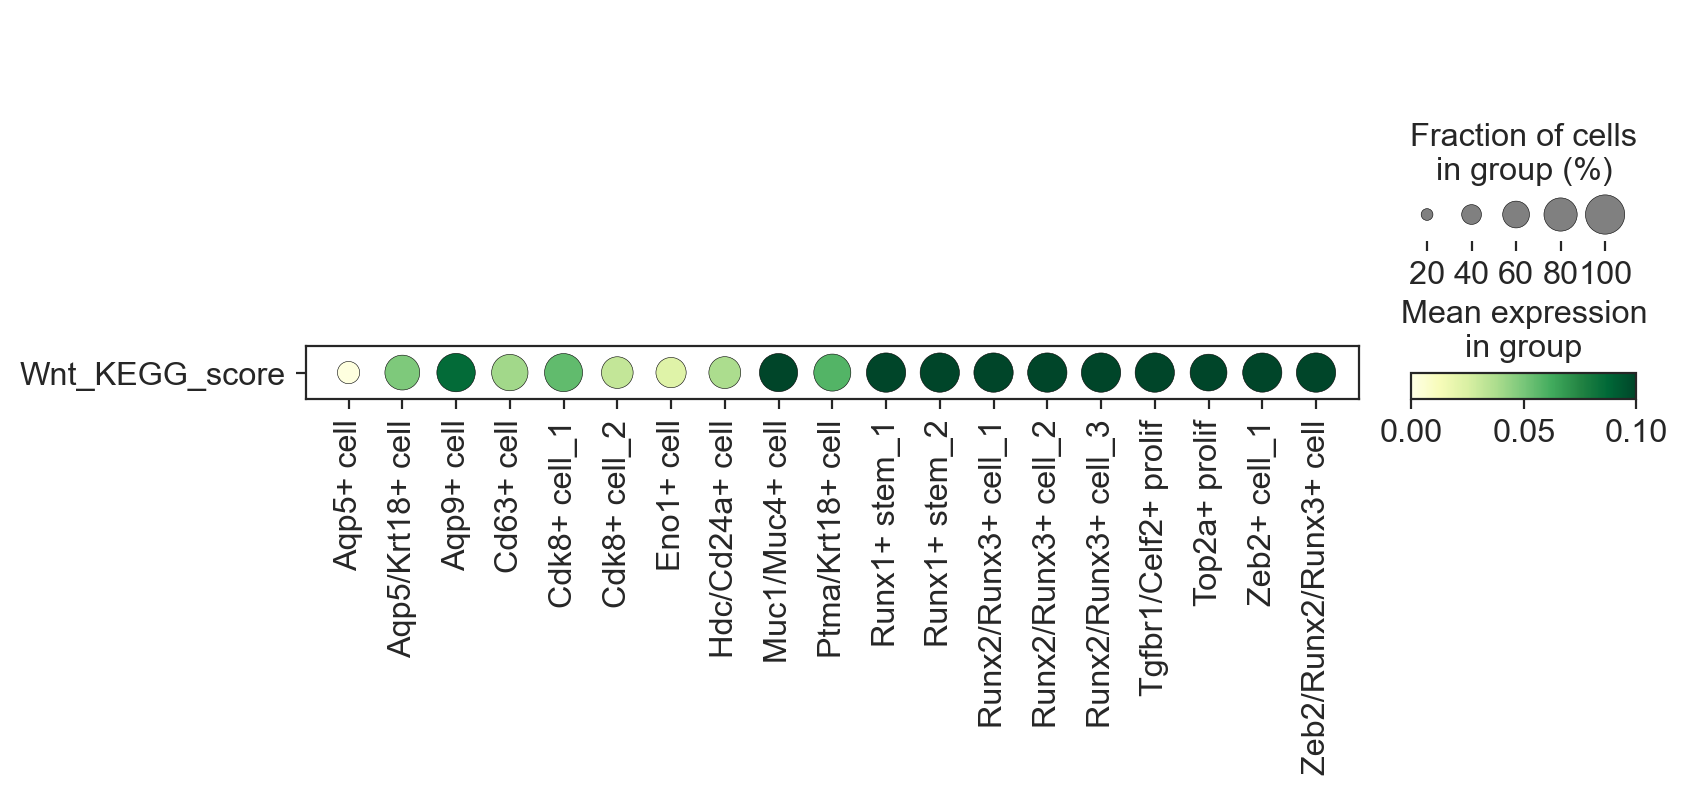

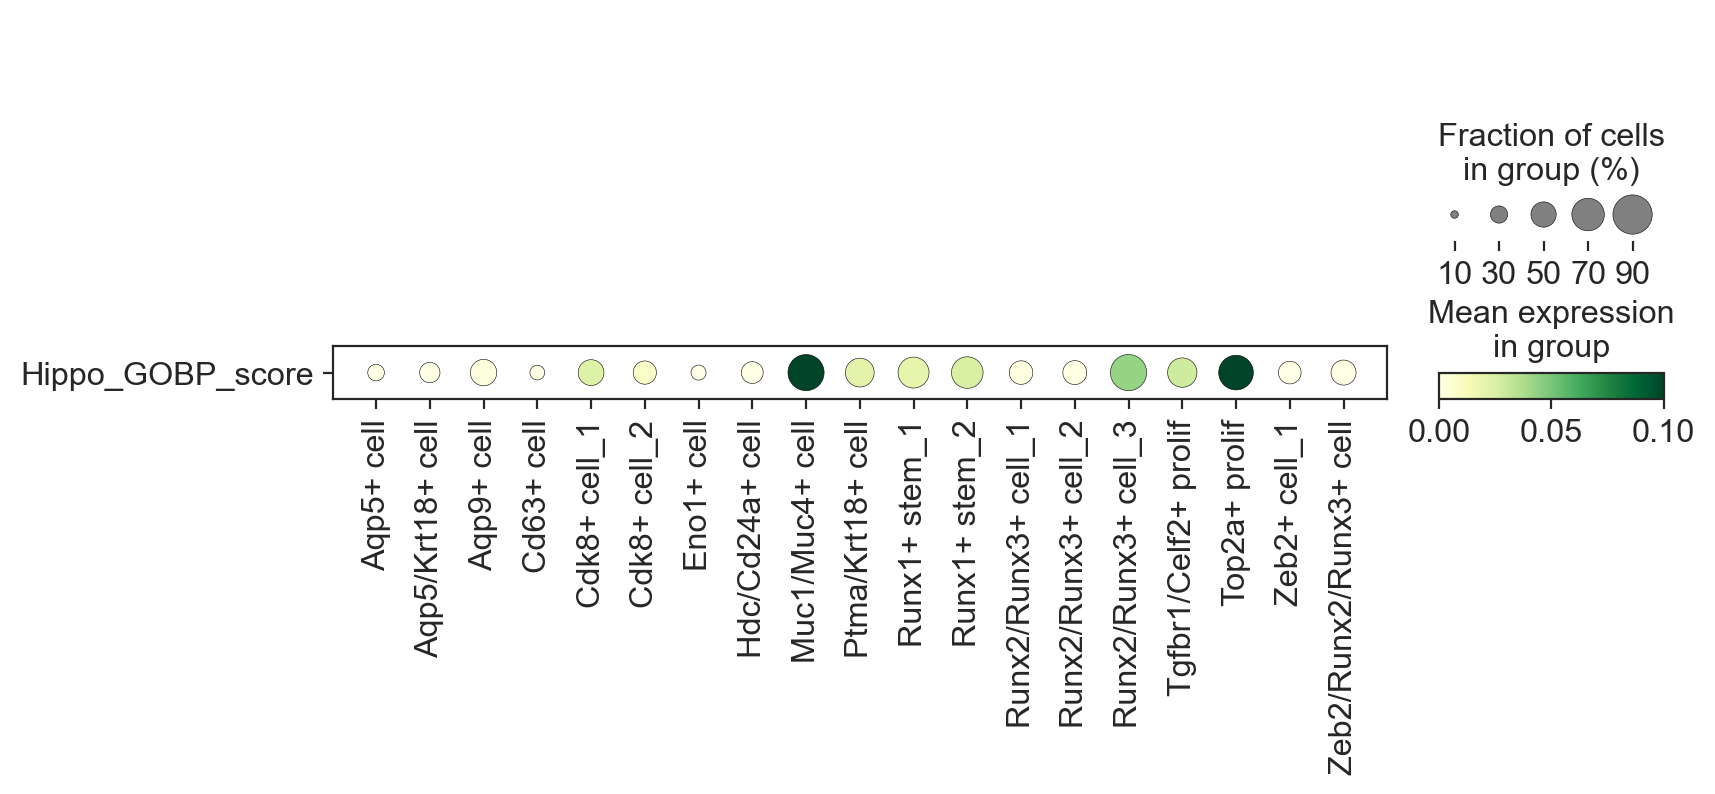

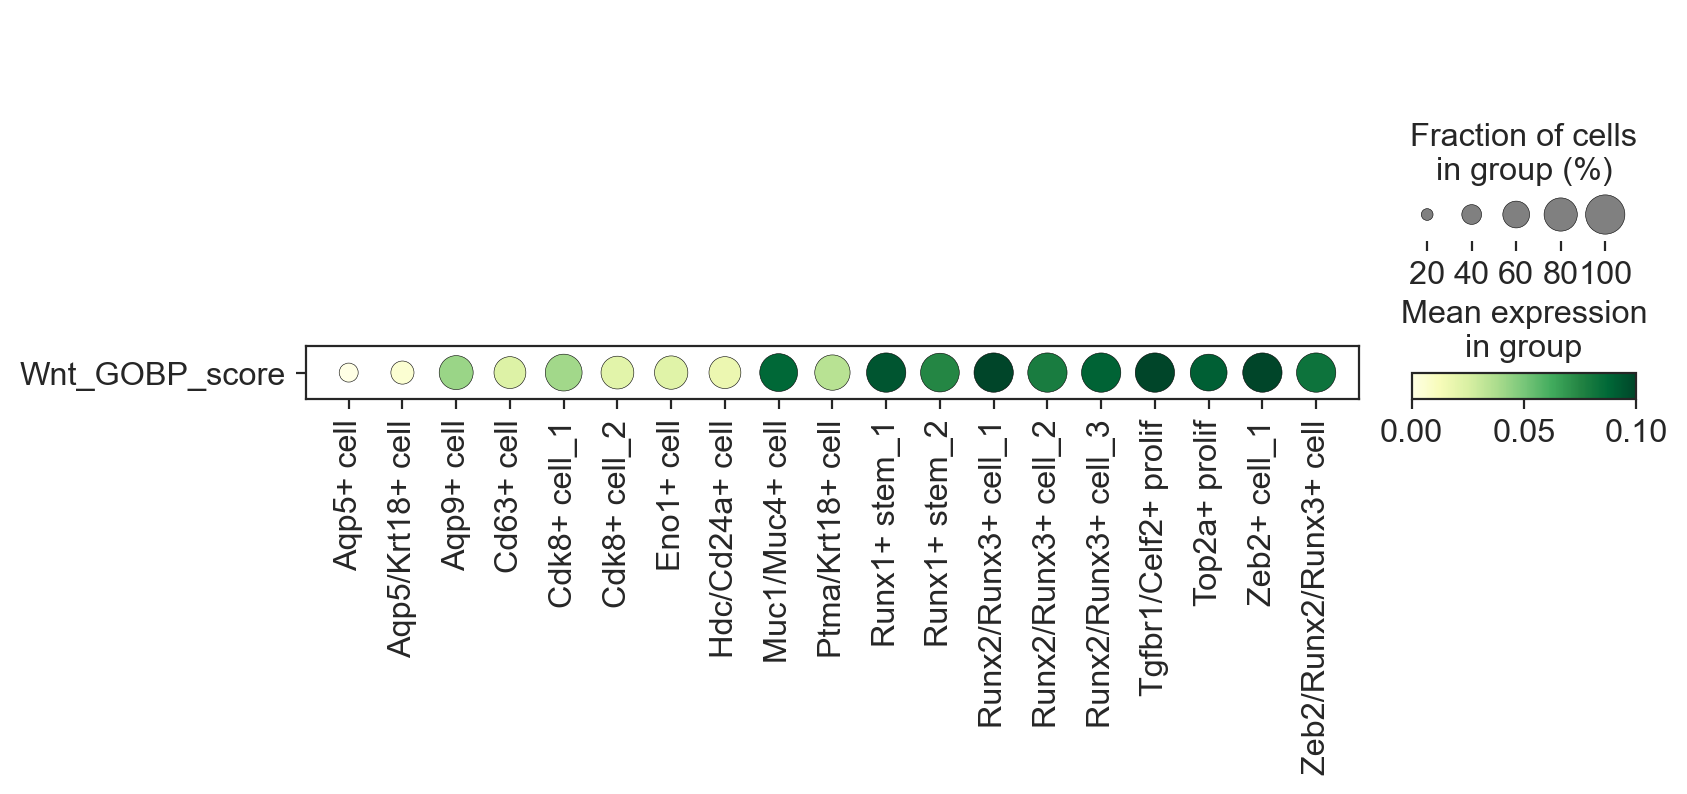

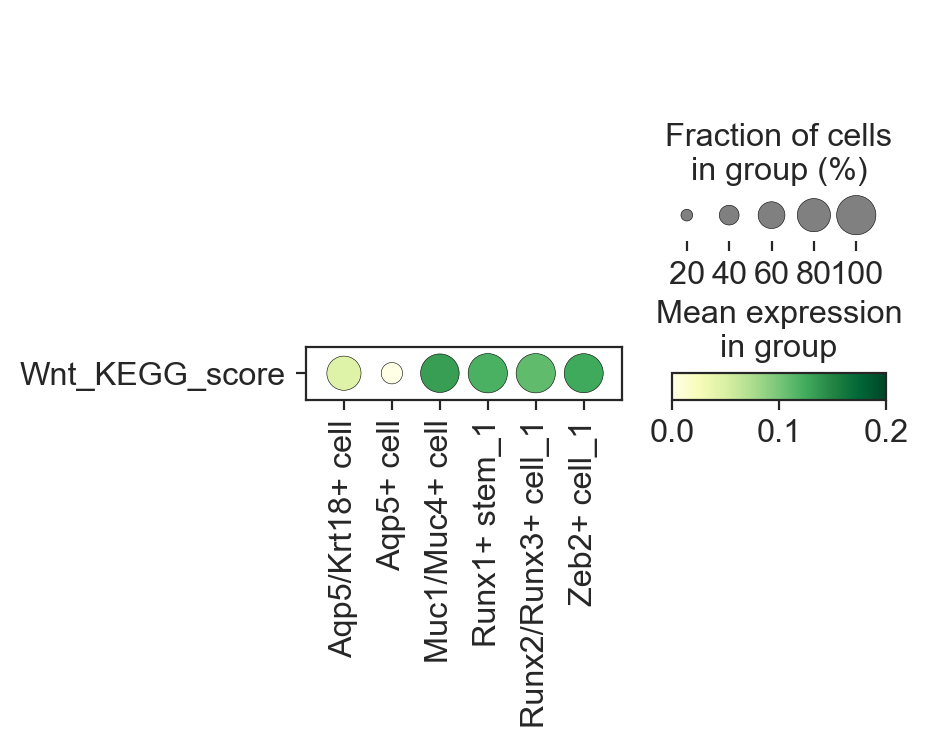

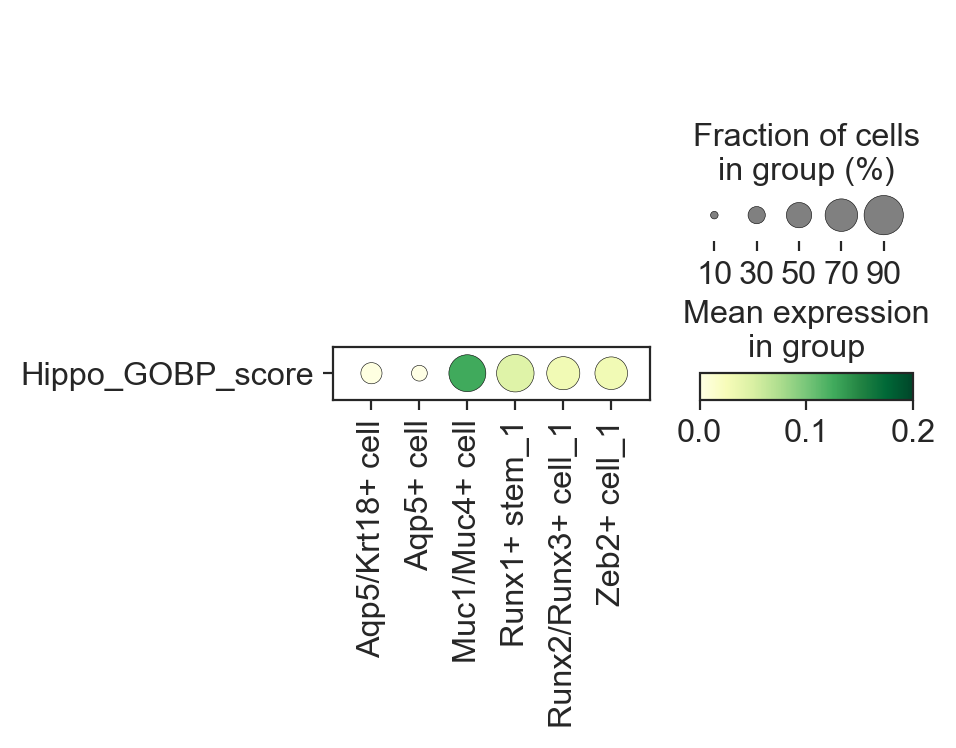

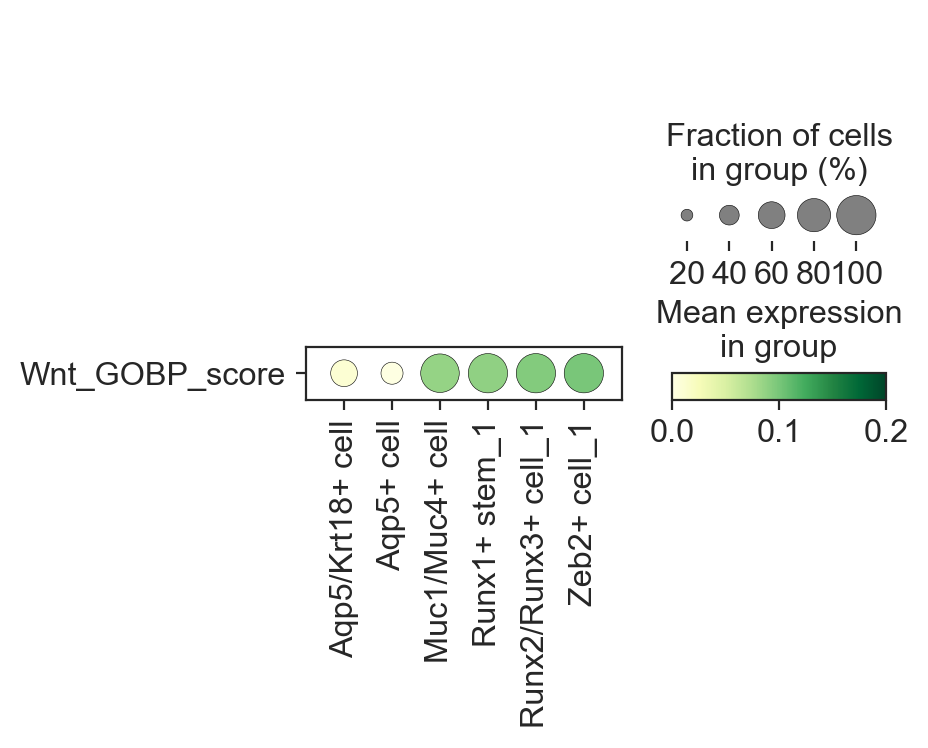

In [96]:
sc.pl.dotplot(adata, ['Wnt_KEGG_score'],vmin=0.00,vmax=0.1,cmap='YlGn', groupby='celltype', swap_axes=True)#, save='_srcc_score_by_type.pdf')
sc.pl.dotplot(adata, ['Hippo_GOBP_score'],vmin=0.00,vmax=0.1,cmap='YlGn', groupby='celltype', swap_axes=True)#, save='_srcc_score_by_type.pdf')
sc.pl.dotplot(adata, ['Wnt_GOBP_score'],vmin=0.00,vmax=0.1,cmap='YlGn', groupby='celltype', swap_axes=True)#, save='_srcc_score_by_type.pdf')

sc.pl.dotplot(adata_sub, ['Wnt_KEGG_score'],vmin=0.00,vmax=0.2,cmap='YlGn', groupby='celltype', swap_axes=True, save='_KEGG_Wnt_score_in_two_cell_lineage.pdf')
sc.pl.dotplot(adata_sub, ['Hippo_GOBP_score'],vmin=0.00,vmax=0.2,cmap='YlGn', groupby='celltype', swap_axes=True, save='_GOBP_Hippo_score_in_two_cell_lineage.pdf')
sc.pl.dotplot(adata_sub, ['Wnt_GOBP_score'],vmin=0.00,vmax=0.2,cmap='YlGn', groupby='celltype', swap_axes=True, save='_GOBP_Wnt_score_in_two_cell_lineage.pdf')


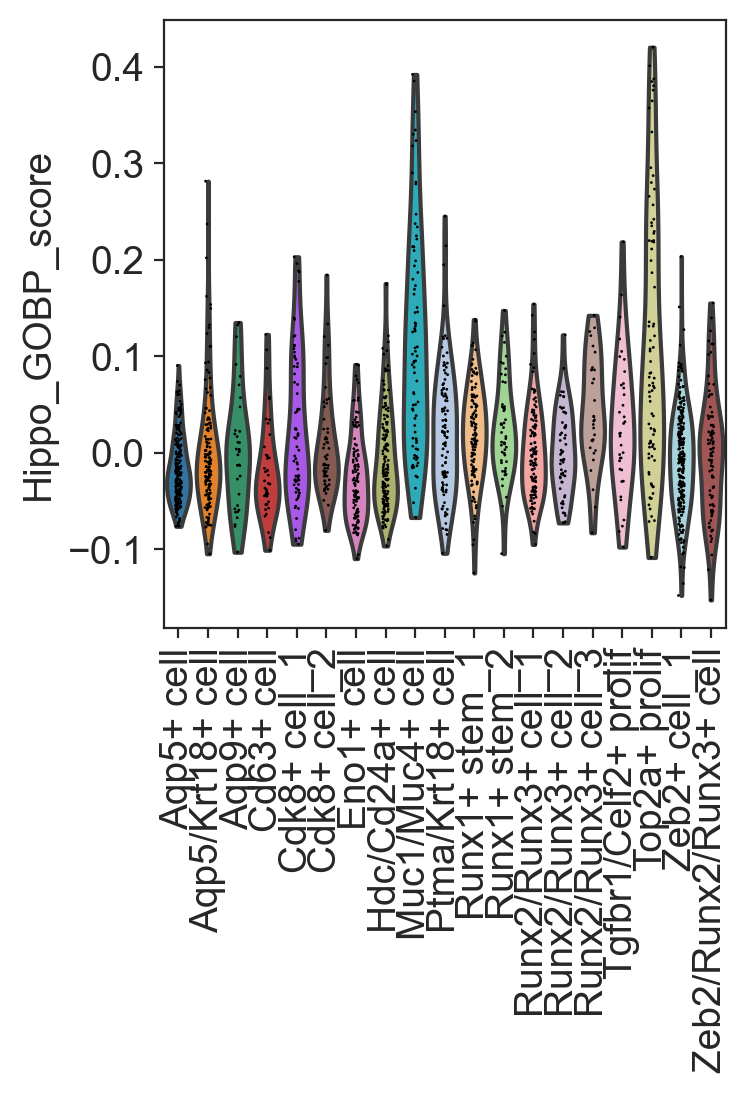

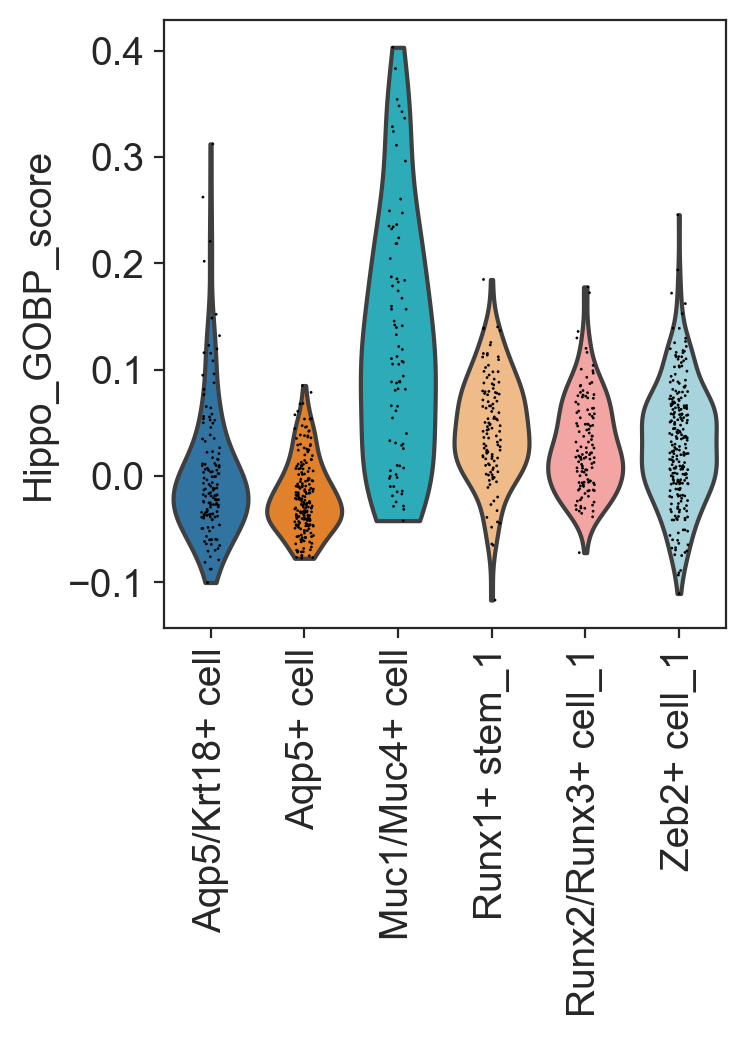

In [93]:
sc.pl.violin(adata, ['Hippo_GOBP_score'], groupby='celltype', swap_axes=False, rotation=90)#, save='_Mucs_by_type_1.pdf')
sc.pl.violin(adata_sub, ['Hippo_GOBP_score'], groupby='celltype', swap_axes=False, rotation=90, save='_Hippo_GOBP_score_in_two_cell_lineage.pdf')

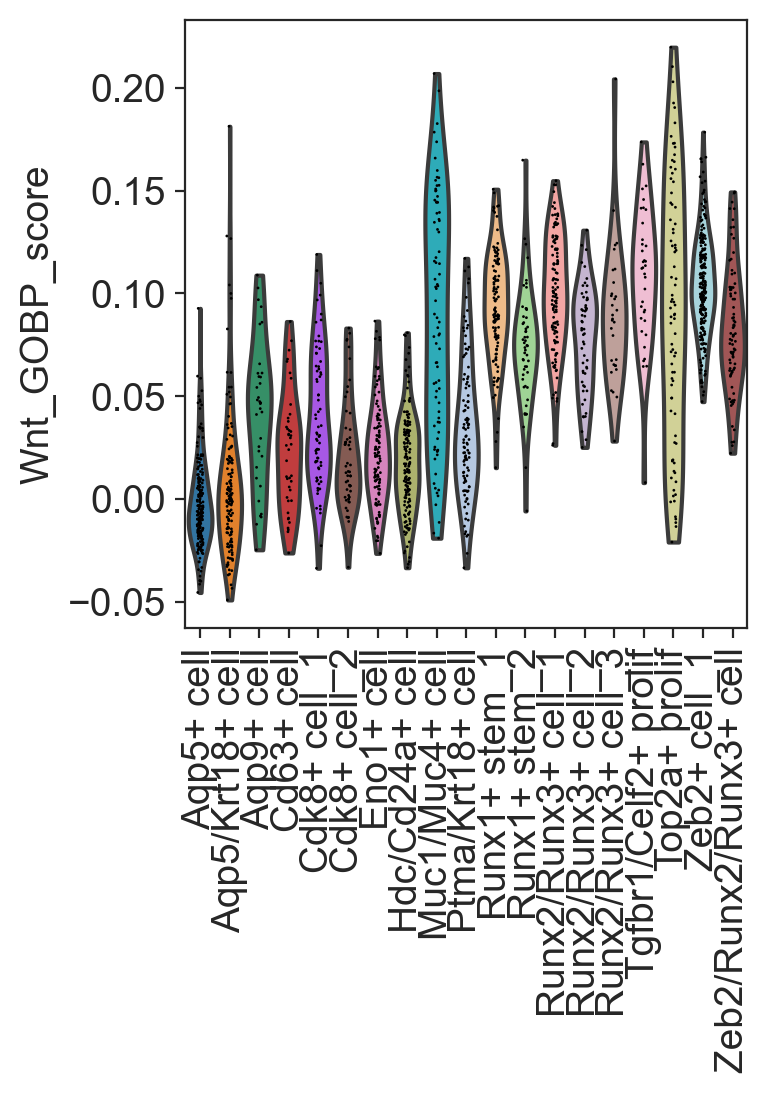

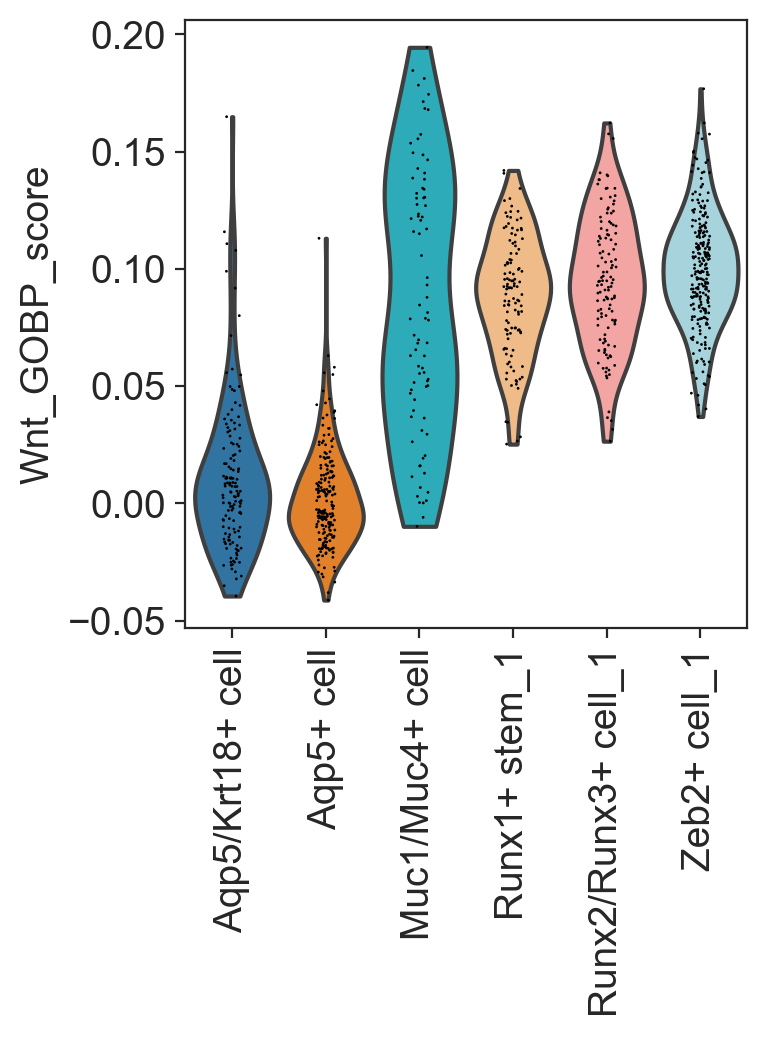

In [92]:
sc.pl.violin(adata, ['Wnt_GOBP_score'], groupby='celltype', swap_axes=False, rotation=90)#, save='_Mucs_by_type_1.pdf')
sc.pl.violin(adata_sub, ['Wnt_GOBP_score'], groupby='celltype', swap_axes=False, rotation=90, save='_Wnt_GOBP_score_in_two_cell_lineage.pdf')

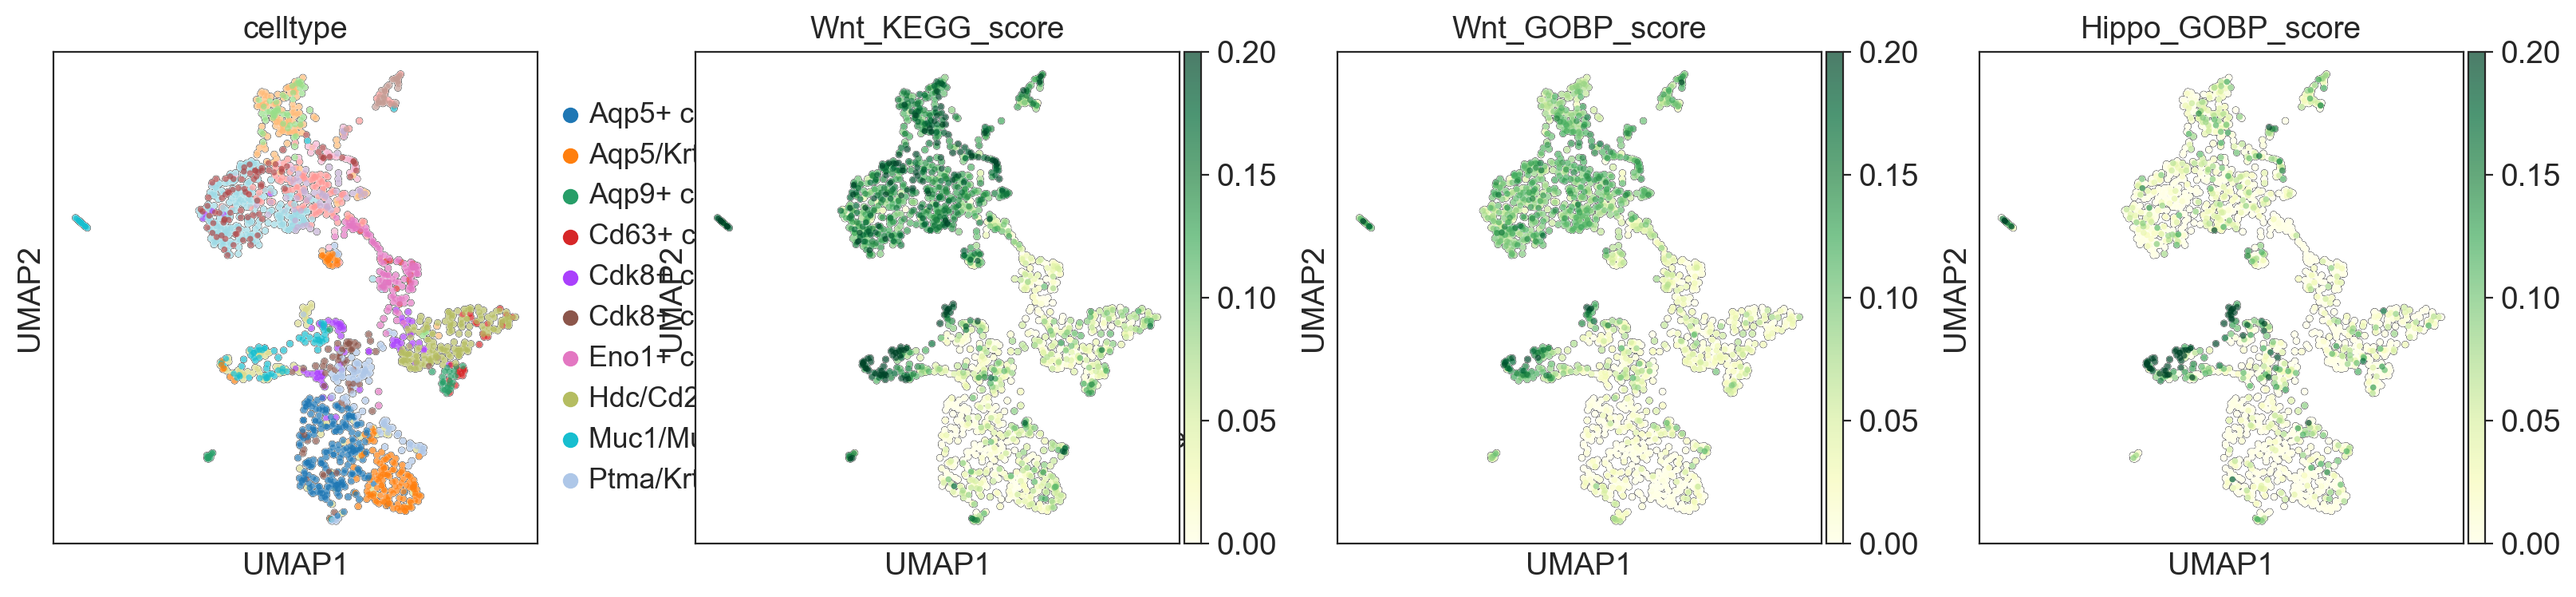

In [91]:
sc.pl.umap(adata,color=['celltype','Wnt_KEGG_score','Wnt_GOBP_score','Hippo_GOBP_score'], size=30,vmin=0.0, vmax=[0.2,0.2,0.2,0.2], add_outline=True, outline_width=(0.05,0.05), cmap='YlGn', save="_wnt_hippo_score_by_celltype.pdf")

# Separate datasets and integrate velocity values to each separated dataset

In [27]:
adata_wt = adata_pf[adata_pf.obs['tissue']=='WT']
adata_wt

View of AnnData object with n_obs × n_vars = 4833 × 12683
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'tissue', 'batch_detail', 'batch', 'leiden', 'sample_batch', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts', 'velocity_self_transition', 'root_cells', 'end_points', 'velocity_pseudotime', 'latent_time', 'velocity_length', 'velocity_confidence', 'velocity_confidence_transition', 'celltype', 'Celf_expression', 'celltype_1', 'Phate1', 'Phate2'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells-0-0', 'n_cells_by_counts-0-0', 'mean_counts-0-0', 'pct_dropout_by_counts-0-0', 'total_counts-0-0', 'n_cells-1-0', 'n_cells_by_counts-1-0', 'mean_counts-1-0', 'pct_dropout_by_counts-1-0', 'total_counts-1-0', 'n_cells-0-1', 'n_cells_by_counts-0-1', 'mean_counts-0-1', 'pct_dropout_by_counts-0-1', 'total_counts-0-1', 'n_cells-1-1', 'n_cells_by_counts-1-1', 'mean_counts-1-1', 'pct_dropout_by_counts-1-1', 'total_counts-1-1', 

In [28]:
adata_pc = adata_pf[adata_pf.obs['tissue']=='PC']
adata_pc

View of AnnData object with n_obs × n_vars = 4852 × 12683
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'tissue', 'batch_detail', 'batch', 'leiden', 'sample_batch', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts', 'velocity_self_transition', 'root_cells', 'end_points', 'velocity_pseudotime', 'latent_time', 'velocity_length', 'velocity_confidence', 'velocity_confidence_transition', 'celltype', 'Celf_expression', 'celltype_1', 'Phate1', 'Phate2'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells-0-0', 'n_cells_by_counts-0-0', 'mean_counts-0-0', 'pct_dropout_by_counts-0-0', 'total_counts-0-0', 'n_cells-1-0', 'n_cells_by_counts-1-0', 'mean_counts-1-0', 'pct_dropout_by_counts-1-0', 'total_counts-1-0', 'n_cells-0-1', 'n_cells_by_counts-0-1', 'mean_counts-0-1', 'pct_dropout_by_counts-0-1', 'total_counts-0-1', 'n_cells-1-1', 'n_cells_by_counts-1-1', 'mean_counts-1-1', 'pct_dropout_by_counts-1-1', 'total_counts-1-1', 

In [29]:
adata_pn = adata_pf[adata_pf.obs['tissue']=='PN']
adata_pn

View of AnnData object with n_obs × n_vars = 5646 × 12683
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'tissue', 'batch_detail', 'batch', 'leiden', 'sample_batch', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts', 'velocity_self_transition', 'root_cells', 'end_points', 'velocity_pseudotime', 'latent_time', 'velocity_length', 'velocity_confidence', 'velocity_confidence_transition', 'celltype', 'Celf_expression', 'celltype_1', 'Phate1', 'Phate2'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells-0-0', 'n_cells_by_counts-0-0', 'mean_counts-0-0', 'pct_dropout_by_counts-0-0', 'total_counts-0-0', 'n_cells-1-0', 'n_cells_by_counts-1-0', 'mean_counts-1-0', 'pct_dropout_by_counts-1-0', 'total_counts-1-0', 'n_cells-0-1', 'n_cells_by_counts-0-1', 'mean_counts-0-1', 'pct_dropout_by_counts-0-1', 'total_counts-0-1', 'n_cells-1-1', 'n_cells_by_counts-1-1', 'mean_counts-1-1', 'pct_dropout_by_counts-1-1', 'total_counts-1-1', 

In [30]:
adata_pcn = adata_pf[adata_pf.obs['tissue']=='PCN']
adata_pcn

View of AnnData object with n_obs × n_vars = 4262 × 12683
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'tissue', 'batch_detail', 'batch', 'leiden', 'sample_batch', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts', 'velocity_self_transition', 'root_cells', 'end_points', 'velocity_pseudotime', 'latent_time', 'velocity_length', 'velocity_confidence', 'velocity_confidence_transition', 'celltype', 'Celf_expression', 'celltype_1', 'Phate1', 'Phate2'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells-0-0', 'n_cells_by_counts-0-0', 'mean_counts-0-0', 'pct_dropout_by_counts-0-0', 'total_counts-0-0', 'n_cells-1-0', 'n_cells_by_counts-1-0', 'mean_counts-1-0', 'pct_dropout_by_counts-1-0', 'total_counts-1-0', 'n_cells-0-1', 'n_cells_by_counts-0-1', 'mean_counts-0-1', 'pct_dropout_by_counts-0-1', 'total_counts-0-1', 'n_cells-1-1', 'n_cells_by_counts-1-1', 'mean_counts-1-1', 'pct_dropout_by_counts-1-1', 'total_counts-1-1', 

In [31]:
#WT_scvelo
a1 = sc.read('WT_merge_2ndtry_final.h5ad')
a1

AnnData object with n_obs × n_vars = 4865 × 1853
    obs: 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts', 'velocity_self_transition', 'louvain', 'root_cells', 'end_points', 'velocity_pseudotime', 'latent_time', 'velocity_length', 'velocity_confidence', 'velocity_confidence_transition'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'highly_variable', 'fit_r2', 'fit_alpha', 'fit_beta', 'fit_gamma', 'fit_t_', 'fit_scaling', 'fit_std_u', 'fit_std_s', 'fit_likelihood', 'fit_u0', 'fit_s0', 'fit_pval_steady', 'fit_steady_u', 'fit_steady_s', 'fit_variance', 'fit_alignment_scaling', 'velocity_genes'
    uns: 'louvain', 'louvain_colors', 'louvain_sizes', 'neighbors', 'paga', 'pca', 'rank_genes_groups', 'recover_dynamics', 'umap', 'velocity_graph', 'velocity_graph_neg', 'velocity_params'
    obsm: 'X_pca', 'X_umap', 'velocity_umap'
    varm: 'PCs', 'loss'
    layers: 'Ms', 'Mu', 'ambiguous'

In [32]:
#PC_scvelo
a2 = sc.read('PC_merge_2ndtry_final.h5ad')
a2

AnnData object with n_obs × n_vars = 4860 × 1864
    obs: 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts', 'velocity_self_transition', 'leiden', 'root_cells', 'end_points', 'velocity_pseudotime', 'latent_time', 'velocity_length', 'velocity_confidence', 'velocity_confidence_transition'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'highly_variable', 'fit_r2', 'fit_alpha', 'fit_beta', 'fit_gamma', 'fit_t_', 'fit_scaling', 'fit_std_u', 'fit_std_s', 'fit_likelihood', 'fit_u0', 'fit_s0', 'fit_pval_steady', 'fit_steady_u', 'fit_steady_s', 'fit_variance', 'fit_alignment_scaling', 'velocity_genes'
    uns: 'leiden', 'leiden_colors', 'neighbors', 'pca', 'recover_dynamics', 'umap', 'velocity_graph', 'velocity_graph_neg', 'velocity_params'
    obsm: 'X_pca', 'X_umap', 'velocity_umap'
    varm: 'PCs', 'loss'
    layers: 'Ms', 'Mu', 'ambiguous', 'fit_t', 'fit_tau', 'fit_tau_', 'matrix', 'spli

In [33]:
#PN_scvelo
a3 = sc.read('PN_merge_2ndtry_final.h5ad')
a3

AnnData object with n_obs × n_vars = 5676 × 1774
    obs: 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts', 'velocity_self_transition', 'leiden', 'root_cells', 'end_points', 'velocity_pseudotime', 'latent_time', 'velocity_length', 'velocity_confidence', 'velocity_confidence_transition'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'highly_variable', 'fit_r2', 'fit_alpha', 'fit_beta', 'fit_gamma', 'fit_t_', 'fit_scaling', 'fit_std_u', 'fit_std_s', 'fit_likelihood', 'fit_u0', 'fit_s0', 'fit_pval_steady', 'fit_steady_u', 'fit_steady_s', 'fit_variance', 'fit_alignment_scaling', 'velocity_genes'
    uns: 'leiden', 'leiden_colors', 'neighbors', 'pca', 'recover_dynamics', 'umap', 'velocity_graph', 'velocity_graph_neg', 'velocity_params'
    obsm: 'X_pca', 'X_umap', 'velocity_umap'
    varm: 'PCs', 'loss'
    layers: 'Ms', 'Mu', 'ambiguous', 'fit_t', 'fit_tau', 'fit_tau_', 'matrix', 'spli

In [34]:
#PCN_scvelo
a4 = sc.read('PCN_merge_2ndtry_final.h5ad')
a4

AnnData object with n_obs × n_vars = 4319 × 1768
    obs: 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts', 'velocity_self_transition', 'leiden', 'root_cells', 'end_points', 'velocity_pseudotime', 'latent_time', 'velocity_length', 'velocity_confidence', 'velocity_confidence_transition'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'highly_variable', 'fit_r2', 'fit_alpha', 'fit_beta', 'fit_gamma', 'fit_t_', 'fit_scaling', 'fit_std_u', 'fit_std_s', 'fit_likelihood', 'fit_u0', 'fit_s0', 'fit_pval_steady', 'fit_steady_u', 'fit_steady_s', 'fit_variance', 'fit_alignment_scaling', 'velocity_genes'
    uns: 'leiden', 'leiden_colors', 'leiden_sizes', 'neighbors', 'paga', 'pca', 'recover_dynamics', 'umap', 'velocity_graph', 'velocity_graph_neg', 'velocity_params'
    obsm: 'X_pca', 'X_umap', 'velocity_umap'
    varm: 'PCs', 'loss'
    layers: 'Ms', 'Mu', 'ambiguous', 'fit_t', 'fit_tau', 'fi

In [35]:
a1.obs

initial_size_spliced  \
CellID                                                           
sample_alignments_MXPYO:AAGGAATAGGCCGCTT                  7629   
sample_alignments_MXPYO:AAAGGGCCAACATACC                  7009   
sample_alignments_MXPYO:AAGCGTTAGAGCCATG                 13517   
sample_alignments_MXPYO:AAAGGATTCTGAATCG                  7985   
sample_alignments_MXPYO:AAGCCATCAGCCATTA                 10222   
...                                                        ...   
sample_alignments_N62T6:TTTCCTCCAGAGGCTA                  8531   
sample_alignments_N62T6:TTTCAGTGTCTACTGA                  6949   
sample_alignments_N62T6:TTTGGTTGTAGTTACC                 10217   
sample_alignments_N62T6:TTTCGATAGGACTAAT                  5999   
sample_alignments_N62T6:TTTGATCGTCGGTAAG                  7975   

                                          initial_size_unspliced  \
CellID                                                             
sample_alignments_MXPYO:AAGGAATAGGCCGCTT                     772   
sample_alignments_MXPYO:AAAGGGCCAACATACC                     677   
sample_alignments_MXPYO:AAGCGTTAGAGCCATG                    1091   
sample_alignments_MXPYO:AAAGGATTCTGAATCG                     537   
sample_alignments_MXPYO:AAGCCATCAGCCATTA                     571   
...                                                          ...   
sample_alignments_N62T6:TTTCCTCCAGAGGCTA                     896   
sample_alignments_N62T6:TTTCAGTGTCTACTGA                     658   
sample_alignments_N62T6:TTTGGTTGTAGTTACC                     938   
sample_alignments_N62T6:TTTCGATAGGACTAAT                     812   
sample_alignments_N62T6:TTTGATCGTCGGTAAG                    1062   

                                          initial_size    n_counts  \
CellID                                                               
sample_alignments_MXPYO:AAGGAATAGGCCGCTT        7629.0  642.011963   
sample_alignments_MXPYO:AAAGGGCCAACATACC        7009.0  635.120300   
sample_alignments_MXPYO:AAGCGTTAGAGCCATG       13517.0  710.696167   
sample_alignments_MXPYO:AAAGGATTCTGAATCG        7985.0  582.625732   
sample_alignments_MXPYO:AAGCCATCAGCCATTA       10222.0  583.381653   
...                                                ...         ...   
sample_alignments_N62T6:TTTCCTCCAGAGGCTA        8531.0  629.358398   
sample_alignments_N62T6:TTTCAGTGTCTACTGA        6949.0  547.191040   
sample_alignments_N62T6:TTTGGTTGTAGTTACC       10217.0  729.046814   
sample_alignments_N62T6:TTTCGATAGGACTAAT        5999.0  597.499939   
sample_alignments_N62T6:TTTGATCGTCGGTAAG        7975.0  590.158081   

                                          velocity_self_transition louvain  \
CellID                                                                       
sample_alignments_MXPYO:AAGGAATAGGCCGCTT                  0.136244    WT_6   
sample_alignments_MXPYO:AAAGGGCCAACATACC                  0.525510    WT_8   
sample_alignments_MXPYO:AAGCGTTAGAGCCATG                  0.162280    WT_1   
sample_alignments_MXPYO:AAAGGATTCTGAATCG                  0.277323    WT_8   
sample_alignments_MXPYO:AAGCCATCAGCCATTA                  0.301449    WT_4   
...                                                            ...     ...   
sample_alignments_N62T6:TTTCCTCCAGAGGCTA                  0.268940    WT_2   
sample_alignments_N62T6:TTTCAGTGTCTACTGA                  0.561617    WT_6   
sample_alignments_N62T6:TTTGGTTGTAGTTACC                  0.021657    WT_8   
sample_alignments_N62T6:TTTCGATAGGACTAAT                  0.164815    WT_7   
sample_alignments_N62T6:TTTGATCGTCGGTAAG                  0.529343    WT_6   

                                          root_cells  end_points  \
CellID                                                             
sample_alignments_MXPYO:AAGGAATAGGCCGCTT    0.044483    0.001295   
sample_alignments_MXPYO:AAAGGGCCAACATACC    0.002600    1.000000   
sample_alignments_MXPYO:AAGCGTTAGAGCCATG    0.777264    0.000217   
sample_alignments_MXPYO:AAAGGATT

In [36]:
ls = [a1, a2, a3, a4]

In [37]:
for a in ls:
    if a is not None:
        scv.utils.clean_obs_names(a)
print('done')

done


In [38]:
a1.obs

initial_size_spliced  initial_size_unspliced  initial_size  \
AAGGAATAGGCCGCTT                  7629                     772        7629.0   
AAAGGGCCAACATACC                  7009                     677        7009.0   
AAGCGTTAGAGCCATG                 13517                    1091       13517.0   
AAAGGATTCTGAATCG                  7985                     537        7985.0   
AAGCCATCAGCCATTA                 10222                     571       10222.0   
...                                ...                     ...           ...   
TTTCCTCCAGAGGCTA                  8531                     896        8531.0   
TTTCAGTGTCTACTGA                  6949                     658        6949.0   
TTTGGTTGTAGTTACC                 10217                     938       10217.0   
TTTCGATAGGACTAAT                  5999                     812        5999.0   
TTTGATCGTCGGTAAG                  7975                    1062        7975.0   

                    n_counts  velocity_self_transition louvain  root_cells  \
AAGGAATAGGCCGCTT  642.011963                  0.136244    WT_6    0.044483   
AAAGGGCCAACATACC  635.120300                  0.525510    WT_8    0.002600   
AAGCGTTAGAGCCATG  710.696167                  0.162280    WT_1    0.777264   
AAAGGATTCTGAATCG  582.625732                  0.277323    WT_8    0.141168   
AAGCCATCAGCCATTA  583.381653                  0.301449    WT_4    0.294389   
...                      ...                       ...     ...         ...   
TTTCCTCCAGAGGCTA  629.358398                  0.268940    WT_2    0.496736   
TTTCAGTGTCTACTGA  547.191040                  0.561617    WT_6    0.159555   
TTTGGTTGTAGTTACC  729.046814                  0.021657    WT_8    0.016335   
TTTCGATAGGACTAAT  597.499939                  0.164815    WT_7    0.001675   
TTTGATCGTCGGTAAG  590.158081                  0.529343    WT_6    0.000206   

                  end_points  velocity_pseudotime  latent_time  \
AAGGAATAGGCCGCTT    0.001295             0.222186     0.222487   
AAAGGGCCAACATACC    1.000000             0.661071     0.650460   
AAGCGTTAGAGCCATG    0.000217             0.157945     0.236581   
AAAGGATTCTGAATCG    0.008622             0.502397     0.337024   
AAGCCATCAGCCATTA    0.001480             0.069355     0.199701   
...                      ...                  ...          ...   
TTTCCTCCAGAGGCTA    0.003174             0.034359     0.110481   
TTTCAGTGTCTACTGA    0.007656             0.302999     0.204129   
TTTGGTTGTAGTTACC    0.007700             0.527496     0.460771   
TTTCGATAGGACTAAT    0.002618             0.204658     0.193596   
TTTGATCGTCGGTAAG    0.254757             0.225008     0.240362   

                  velocity_length  velocity_confidence  \
AAGGAATAGGCCGCTT             9.56             0.855079   
AAAGGGCCAACATACC            12.71             0.858027   
AAGCGTTAGAGCCATG             8.95             0.878400   
AAAGGATTCTGAATCG             8.20             0.754470   
AAGCCATCAGCCATTA             8.65             0.728453   
...                           ...                  ...   
TTTCCTCCAGAGGCTA             8.50             0.846552   
TTTCAGTGTCTACTGA             8.74             0.803061   
TTTGGTTGTAGTTACC             9.67             0.917728   
TTTCGATAGGACTAAT             9.97             0.872927   
TTTGATCGTCGGTAAG            10.16             0.861087   

                  velocity_confidence_transition              sample_batch  
AAGGAATAGGCCGCTT                        0.646531  sample_alignments_MXPYO:  
AAAGGGCCAACATACC                        0.226930  sample_alignments_MXPYO:  
AAGCGTTAGAGCCATG                        0.561404  sample_alignments_MXPYO:  
AAAGGATTCTGAATCG                        0.441069  sample_alignments_MXPYO:  
AAGCCATCAGCCATTA                        0.458669  sample_alignments_MXPYO:  
...                                          ...                       ...  
TTTCCTCCAGAGGCTA                        0.476785  sample_alignments_N62T6:  
TTTCAGTGTCTACT

In [39]:
wt= scv.utils.merge(adata_wt, a1)
wt

AnnData object with n_obs × n_vars = 4833 × 1852
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'tissue', 'batch_detail', 'batch', 'leiden', 'sample_batch', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts', 'velocity_self_transition', 'root_cells', 'end_points', 'velocity_pseudotime', 'latent_time', 'velocity_length', 'velocity_confidence', 'velocity_confidence_transition', 'celltype', 'Celf_expression', 'celltype_1', 'Phate1', 'Phate2', 'louvain'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells-0-0', 'n_cells_by_counts-0-0', 'mean_counts-0-0', 'pct_dropout_by_counts-0-0', 'total_counts-0-0', 'n_cells-1-0', 'n_cells_by_counts-1-0', 'mean_counts-1-0', 'pct_dropout_by_counts-1-0', 'total_counts-1-0', 'n_cells-0-1', 'n_cells_by_counts-0-1', 'mean_counts-0-1', 'pct_dropout_by_counts-0-1', 'total_counts-0-1', 'n_cells-1-1', 'n_cells_by_counts-1-1', 'mean_counts-1-1', 'pct_dropout_by_counts-1-1', 'total_counts-1-1'

In [40]:
pc= scv.utils.merge(adata_pc, a2)
pc

AnnData object with n_obs × n_vars = 4852 × 1858
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'tissue', 'batch_detail', 'batch', 'leiden', 'sample_batch', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts', 'velocity_self_transition', 'root_cells', 'end_points', 'velocity_pseudotime', 'latent_time', 'velocity_length', 'velocity_confidence', 'velocity_confidence_transition', 'celltype', 'Celf_expression', 'celltype_1', 'Phate1', 'Phate2'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells-0-0', 'n_cells_by_counts-0-0', 'mean_counts-0-0', 'pct_dropout_by_counts-0-0', 'total_counts-0-0', 'n_cells-1-0', 'n_cells_by_counts-1-0', 'mean_counts-1-0', 'pct_dropout_by_counts-1-0', 'total_counts-1-0', 'n_cells-0-1', 'n_cells_by_counts-0-1', 'mean_counts-0-1', 'pct_dropout_by_counts-0-1', 'total_counts-0-1', 'n_cells-1-1', 'n_cells_by_counts-1-1', 'mean_counts-1-1', 'pct_dropout_by_counts-1-1', 'total_counts-1-1', 'n_cells-

In [41]:
pn= scv.utils.merge(adata_pn, a3)
pn

AnnData object with n_obs × n_vars = 5646 × 1772
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'tissue', 'batch_detail', 'batch', 'leiden', 'sample_batch', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts', 'velocity_self_transition', 'root_cells', 'end_points', 'velocity_pseudotime', 'latent_time', 'velocity_length', 'velocity_confidence', 'velocity_confidence_transition', 'celltype', 'Celf_expression', 'celltype_1', 'Phate1', 'Phate2'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells-0-0', 'n_cells_by_counts-0-0', 'mean_counts-0-0', 'pct_dropout_by_counts-0-0', 'total_counts-0-0', 'n_cells-1-0', 'n_cells_by_counts-1-0', 'mean_counts-1-0', 'pct_dropout_by_counts-1-0', 'total_counts-1-0', 'n_cells-0-1', 'n_cells_by_counts-0-1', 'mean_counts-0-1', 'pct_dropout_by_counts-0-1', 'total_counts-0-1', 'n_cells-1-1', 'n_cells_by_counts-1-1', 'mean_counts-1-1', 'pct_dropout_by_counts-1-1', 'total_counts-1-1', 'n_cells-

In [42]:
pcn= scv.utils.merge(adata_pcn, a4)
pcn

AnnData object with n_obs × n_vars = 4262 × 1766
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'tissue', 'batch_detail', 'batch', 'leiden', 'sample_batch', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts', 'velocity_self_transition', 'root_cells', 'end_points', 'velocity_pseudotime', 'latent_time', 'velocity_length', 'velocity_confidence', 'velocity_confidence_transition', 'celltype', 'Celf_expression', 'celltype_1', 'Phate1', 'Phate2'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells-0-0', 'n_cells_by_counts-0-0', 'mean_counts-0-0', 'pct_dropout_by_counts-0-0', 'total_counts-0-0', 'n_cells-1-0', 'n_cells_by_counts-1-0', 'mean_counts-1-0', 'pct_dropout_by_counts-1-0', 'total_counts-1-0', 'n_cells-0-1', 'n_cells_by_counts-0-1', 'mean_counts-0-1', 'pct_dropout_by_counts-0-1', 'total_counts-0-1', 'n_cells-1-1', 'n_cells_by_counts-1-1', 'mean_counts-1-1', 'pct_dropout_by_counts-1-1', 'total_counts-1-1', 'n_cells-

# WT scvelo on PHATE map

In [59]:
scv.set_figure_params(style='scvelo', dpi=100, dpi_save=300, format='png')

In [43]:
scv.pp.neighbors(wt, n_neighbors=20)
#scv.pp.moments(wt, n_pcs=50, n_neighbors=20)
#scv.tl.recover_dynamics(wt)
#scv.tl.velocity(wt, mode='dynamical')
scv.tl.velocity_graph(wt, basis='phate')

computing neighbors
    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
        Consider computing the graph in an unbiased manner 
        on full expression space by not specifying basis.

computing velocity graph (using 1/16 cores)


  0%|          | 0/4833 [00:00<?, ?cells/s]

    finished (0:00:02) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


saving figure to file ./figures/scvelo_WT_phate_velocity_embedding.png


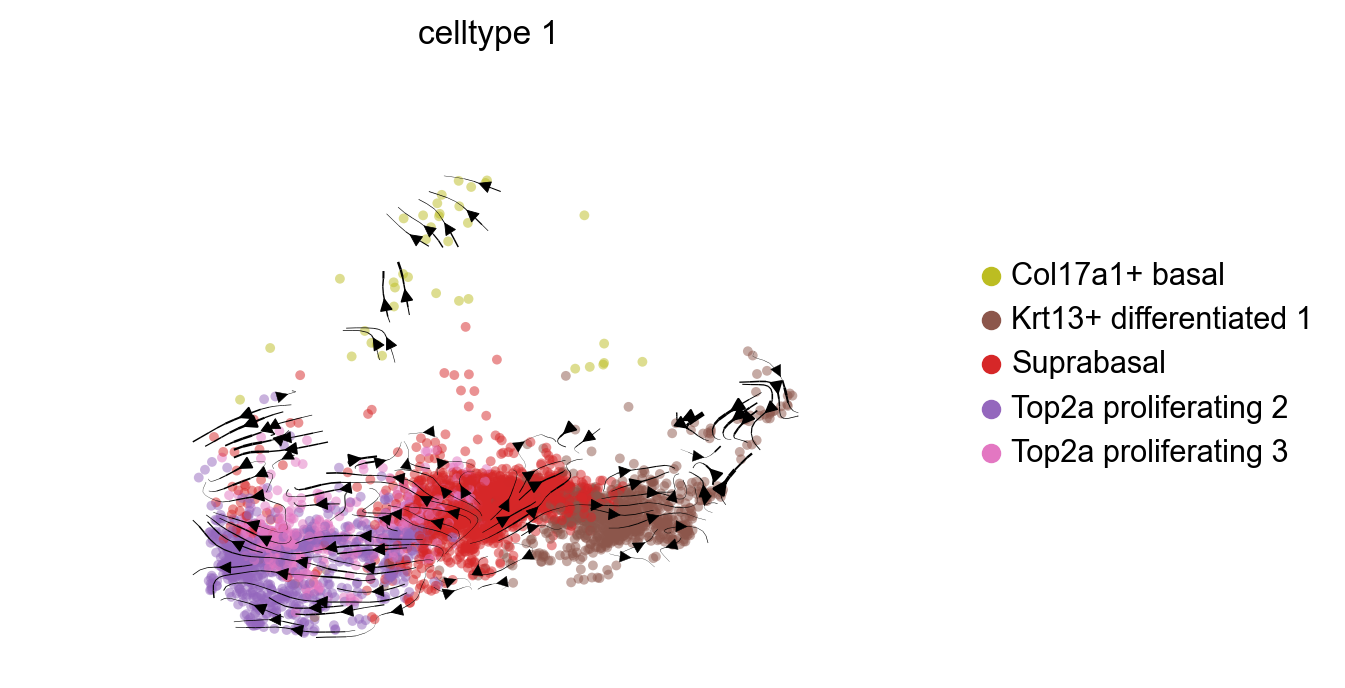

In [73]:
scv.pl.velocity_embedding_stream(wt, basis='phate', legend_loc='right margin', color='celltype_1', size=50, alpha=0.5,
                               palette={'Krt5+ basal_1': '#1f77b4',
             'Top2a proliferating_1': '#ff7f0e' ,
              'Krt5+ basal_3':    '#2ca02c',
              'Suprabasal': '#d62728',
              'Top2a proliferating_2': '#9467bd' ,
                'Krt13+ differentiated_1':'#8c564b',
             'Top2a proliferating_3': '#e377c2' ,
             'Krt5+ basal_2':    '#7f7f7f',
             'Col17a1+ basal': '#bcbd22',
             'Krt13+ differentiated_2':'#17becf'},
                                 xlim=[-0.04, 0.07], ylim=[-0.04, 0.07], 
                                 save='WT_phate_velocity_embedding.png')

In [45]:
scv.pp.neighbors(pc, n_neighbors=20)
#scv.pp.moments(wt, n_pcs=50, n_neighbors=20)
#scv.tl.recover_dynamics(wt)
#scv.tl.velocity(wt, mode='dynamical')
scv.tl.velocity_graph(pc, basis='phate')

computing neighbors
    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
        Consider computing the graph in an unbiased manner 
        on full expression space by not specifying basis.

computing velocity graph (using 1/16 cores)


  0%|          | 0/4852 [00:00<?, ?cells/s]

    finished (0:00:02) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


saving figure to file ./figures/scvelo_PC_phate_velocity_embedding.png


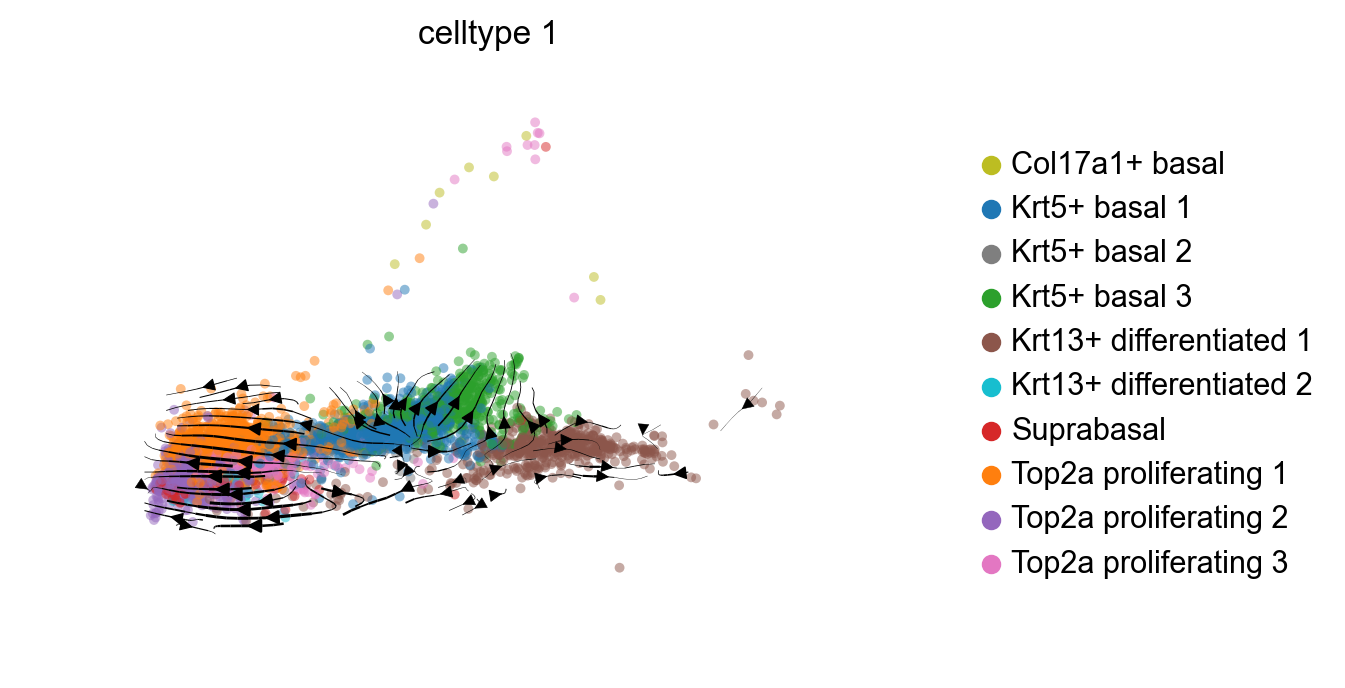

In [74]:
scv.pl.velocity_embedding_stream(pc, basis='phate', legend_loc='right margin', color='celltype_1', size=50, alpha=0.5,
                                palette={'Krt5+ basal_1': '#1f77b4',
             'Top2a proliferating_1': '#ff7f0e' ,
              'Krt5+ basal_3':    '#2ca02c',
              'Suprabasal': '#d62728',
              'Top2a proliferating_2': '#9467bd' ,
                'Krt13+ differentiated_1':'#8c564b',
             'Top2a proliferating_3': '#e377c2' ,
             'Krt5+ basal_2':    '#7f7f7f',
             'Col17a1+ basal': '#bcbd22',
             'Krt13+ differentiated_2':'#17becf'},
                                  xlim=[-0.04, 0.07], ylim=[-0.04, 0.07],
                                 save='PC_phate_velocity_embedding.png')

In [47]:
scv.pp.neighbors(pn, n_neighbors=20)
#scv.pp.moments(wt, n_pcs=50, n_neighbors=20)
#scv.tl.recover_dynamics(wt)
#scv.tl.velocity(wt, mode='dynamical')
scv.tl.velocity_graph(pn, basis='phate')

computing neighbors
    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
        Consider computing the graph in an unbiased manner 
        on full expression space by not specifying basis.

computing velocity graph (using 1/16 cores)


  0%|          | 0/5646 [00:00<?, ?cells/s]

    finished (0:00:02) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


saving figure to file ./figures/scvelo_PN_phate_velocity_embedding.png


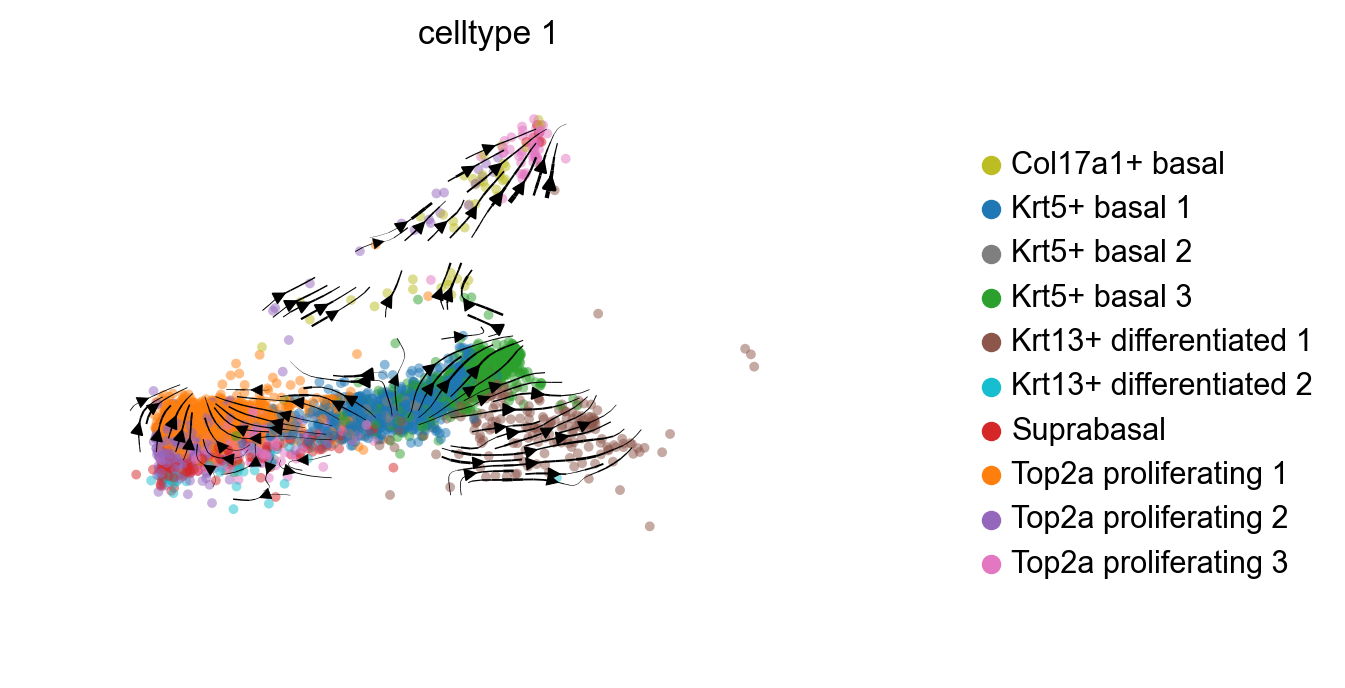

In [75]:
scv.pl.velocity_embedding_stream(pn, basis='phate', legend_loc='right margin', color='celltype_1', size=50, alpha=0.5,
                                palette={'Krt5+ basal_1': '#1f77b4',
             'Top2a proliferating_1': '#ff7f0e' ,
              'Krt5+ basal_3':    '#2ca02c',
              'Suprabasal': '#d62728',
              'Top2a proliferating_2': '#9467bd' ,
                'Krt13+ differentiated_1':'#8c564b',
             'Top2a proliferating_3': '#e377c2' ,
             'Krt5+ basal_2':    '#7f7f7f',
             'Col17a1+ basal': '#bcbd22',
             'Krt13+ differentiated_2':'#17becf'},
                                  xlim=[-0.04, 0.07], ylim=[-0.04, 0.07],
                                 save='PN_phate_velocity_embedding.png')

In [49]:
scv.pp.neighbors(pcn, n_neighbors=20)
#scv.pp.moments(wt, n_pcs=50, n_neighbors=20)
#scv.tl.recover_dynamics(wt)
#scv.tl.velocity(wt, mode='dynamical')
scv.tl.velocity_graph(pcn, basis='phate')

computing neighbors
    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
        Consider computing the graph in an unbiased manner 
        on full expression space by not specifying basis.

computing velocity graph (using 1/16 cores)


  0%|          | 0/4262 [00:00<?, ?cells/s]

    finished (0:00:01) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


saving figure to file ./figures/scvelo_PCN_phate_velocity_embedding.png


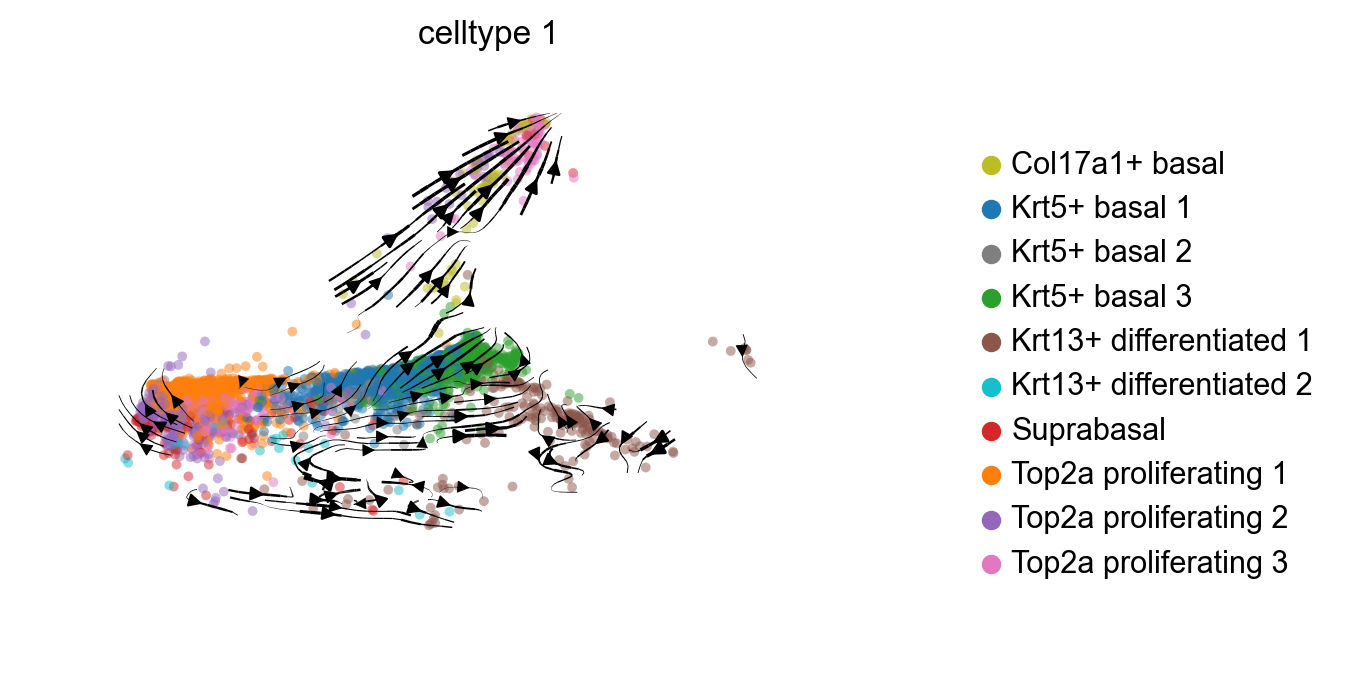

In [76]:
scv.pl.velocity_embedding_stream(pcn, basis='phate', legend_loc='right margin', color='celltype_1', size=50, alpha=0.5,
                                palette={'Krt5+ basal_1': '#1f77b4',
             'Top2a proliferating_1': '#ff7f0e' ,
              'Krt5+ basal_3':    '#2ca02c',
              'Suprabasal': '#d62728',
              'Top2a proliferating_2': '#9467bd' ,
                'Krt13+ differentiated_1':'#8c564b',
             'Top2a proliferating_3': '#e377c2' ,
             'Krt5+ basal_2':    '#7f7f7f',
             'Col17a1+ basal': '#bcbd22',
             'Krt13+ differentiated_2':'#17becf'},
                                 xlim=[-0.04, 0.07], ylim=[-0.04, 0.07],
                                 save='PCN_phate_velocity_embedding.png')

In [473]:
pcn

AnnData object with n_obs × n_vars = 4262 × 1766
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'tissue', 'batch_detail', 'batch', 'leiden', 'sample_batch', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts', 'velocity_self_transition', 'root_cells', 'end_points', 'velocity_pseudotime', 'latent_time', 'velocity_length', 'velocity_confidence', 'velocity_confidence_transition', 'celltype', 'Celf_expression', 'celltype_1', 'Phate1', 'Phate2'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells-0-0', 'n_cells_by_counts-0-0', 'mean_counts-0-0', 'pct_dropout_by_counts-0-0', 'total_counts-0-0', 'n_cells-1-0', 'n_cells_by_counts-1-0', 'mean_counts-1-0', 'pct_dropout_by_counts-1-0', 'total_counts-1-0', 'n_cells-0-1', 'n_cells_by_counts-0-1', 'mean_counts-0-1', 'pct_dropout_by_counts-0-1', 'total_counts-0-1', 'n_cells-1-1', 'n_cells_by_counts-1-1', 'mean_counts-1-1', 'pct_dropout_by_counts-1-1', 'total_counts-1-1', 'n_cells-

In [51]:
adata_pf.write('phate_info_incorporated.h5ad', compression='gzip')

In [5]:
adata_pf = sc.read('phate_info_incorporated.h5ad')
adata_pf

AnnData object with n_obs × n_vars = 19593 × 12683
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'tissue', 'batch_detail', 'batch', 'leiden', 'sample_batch', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts', 'velocity_self_transition', 'root_cells', 'end_points', 'velocity_pseudotime', 'latent_time', 'velocity_length', 'velocity_confidence', 'velocity_confidence_transition', 'celltype', 'Celf_expression', 'celltype_1', 'Phate1', 'Phate2'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells-0-0', 'n_cells_by_counts-0-0', 'mean_counts-0-0', 'pct_dropout_by_counts-0-0', 'total_counts-0-0', 'n_cells-1-0', 'n_cells_by_counts-1-0', 'mean_counts-1-0', 'pct_dropout_by_counts-1-0', 'total_counts-1-0', 'n_cells-0-1', 'n_cells_by_counts-0-1', 'mean_counts-0-1', 'pct_dropout_by_counts-0-1', 'total_counts-0-1', 'n_cells-1-1', 'n_cells_by_counts-1-1', 'mean_counts-1-1', 'pct_dropout_by_counts-1-1', 'total_counts-1-1', 'n_cell

# Making adata again from counts data (if necessary)

In [16]:
import anndata as ad

In [9]:
df_counts = pd.read_csv('EO_raw_counts.csv')

In [22]:
df_counts

Unnamed: 0    Mrpl15    Lypla1     Tcea1   Atp6v1h    Rb1cc1  \
0      AAACCCAAGACCGTTT  0.000000  0.508400  0.935762  0.000000  0.508400   
1      AAACCCAAGACGACTG  0.388690  0.000000  0.581322  0.000000  0.388690   
2      AAACCCAAGCTTCTAG  0.598920  0.000000  0.821582  0.000000  0.000000   
3      AAACCCAGTCACCTTC  0.549044  0.000000  0.549044  0.000000  0.000000   
4      AAACCCATCCATAAGC  0.615984  0.000000  0.422384  0.000000  0.422384   
...                 ...       ...       ...       ...       ...       ...   
19708  TTTGGAGCAAATTGCC  0.909390  0.401637  0.909390  0.000000  0.000000   
19709  TTTGGAGGTCCCGGTA  0.000000  0.000000  0.000000  0.000000  0.000000   
19710  TTTGGTTAGAAGCGCT  1.124269  0.000000  0.000000  0.526299  0.000000   
19711  TTTGGTTAGAGCATCG  0.000000  0.000000  0.900896  0.000000  0.900896   
19712  TTTGGTTGTTACCTTT  0.772351  0.000000  0.458958  0.000000  0.000000   

       4732440D04Rik    Pcmtd1   Gm26901      Rrs1  ...    mt-Nd3   mt-Nd4l  \
0                0.0  0.719748  0.000000  0.000000  ...  0.508400  0.508400   
1                0.0  0.581322  0.000000  0.388690  ...  0.704388  1.034204   
2                0.0  0.000000  0.000000  0.598920  ...  0.598920  1.107919   
3                0.0  0.000000  0.000000  0.549044  ...  0.750491  0.949133   
4                0.0  0.615984  0.000000  0.422384  ...  0.615984  0.821726   
...              ...       ...       ...       ...  ...       ...       ...   
19708            0.0  0.687400  0.000000  0.401637  ...  0.401637  1.244543   
19709            0.0  0.000000  0.000000  0.000000  ...  0.825866  1.271925   
19710            0.0  0.526299  0.000000  0.526299  ...  0.000000  1.640148   
19711            0.0  0.000000  0.000000  0.000000  ...  0.900896  0.000000   
19712            0.0  0.000000  0.458958  0.772351  ...  0.000000  0.772351   

         mt-Nd4    mt-Nd5    mt-Nd6   mt-Cytb  CAAA01118383.1  Vamp7  \
0      1.170490  0.935762  0.000000  1.347929        0.000000    0.0   
1      1.190762  0.792854  0.000000  1.415341        0.388690    0.0   
2      0.951499  0.000000  0.000000  1.539289        0.598920    0.0   
3      1.220146  0.981535  0.868089  1.281133        0.000000    0.0   
4      1.104723  0.615984  0.000000  1.285486        0.422384    0.0   
...         ...       ...       ...       ...             ...    ...   
19708  2.933522  1.600227  0.687400  3.373256        0.401637    0.0   
19709  2.422221  1.271925  0.000000  3.769706        0.000000    0.0   
19710  1.878128  0.869330  0.000000  3.666022        1.124269    0.0   
19711  2.279403  0.900896  0.000000  3.252339        0.000000    0.0   
19712  2.706595  0.772351  0.000000  3.514996        0.000000    0.0   

       CAAA01147332.1  AC149090.1  
0                 0.0    0.508400  
1                 0.0    0.000000  
2                 0.0    0.000000  
3                 0.0    0.549044  
4                 0.0    0.000000  
...               ...         ...  
19708             0.0    0.000000  
19709             0.0    0.000000  
19710             0.0    0.000000  
19711             0.0    0.000000  
19712             0.0    0.458958  

[19713 rows x 12684 columns]

In [23]:
df_counts_1 = df_counts

In [31]:
df_counts.index = df_counts['Unnamed: 0']
df_counts

Unnamed: 0    Mrpl15    Lypla1     Tcea1   Atp6v1h  \
Unnamed: 0                                                                   
AAACCCAAGACCGTTT  AAACCCAAGACCGTTT  0.000000  0.508400  0.935762  0.000000   
AAACCCAAGACGACTG  AAACCCAAGACGACTG  0.388690  0.000000  0.581322  0.000000   
AAACCCAAGCTTCTAG  AAACCCAAGCTTCTAG  0.598920  0.000000  0.821582  0.000000   
AAACCCAGTCACCTTC  AAACCCAGTCACCTTC  0.549044  0.000000  0.549044  0.000000   
AAACCCATCCATAAGC  AAACCCATCCATAAGC  0.615984  0.000000  0.422384  0.000000   
...                            ...       ...       ...       ...       ...   
TTTGGAGCAAATTGCC  TTTGGAGCAAATTGCC  0.909390  0.401637  0.909390  0.000000   
TTTGGAGGTCCCGGTA  TTTGGAGGTCCCGGTA  0.000000  0.000000  0.000000  0.000000   
TTTGGTTAGAAGCGCT  TTTGGTTAGAAGCGCT  1.124269  0.000000  0.000000  0.526299   
TTTGGTTAGAGCATCG  TTTGGTTAGAGCATCG  0.000000  0.000000  0.900896  0.000000   
TTTGGTTGTTACCTTT  TTTGGTTGTTACCTTT  0.772351  0.000000  0.458958  0.000000   

                    Rb1cc1  4732440D04Rik    Pcmtd1   Gm26901      Rrs1  ...  \
Unnamed: 0                                                               ...   
AAACCCAAGACCGTTT  0.508400            0.0  0.719748  0.000000  0.000000  ...   
AAACCCAAGACGACTG  0.388690            0.0  0.581322  0.000000  0.388690  ...   
AAACCCAAGCTTCTAG  0.000000            0.0  0.000000  0.000000  0.598920  ...   
AAACCCAGTCACCTTC  0.000000            0.0  0.000000  0.000000  0.549044  ...   
AAACCCATCCATAAGC  0.422384            0.0  0.615984  0.000000  0.422384  ...   
...                    ...            ...       ...       ...       ...  ...   
TTTGGAGCAAATTGCC  0.000000            0.0  0.687400  0.000000  0.401637  ...   
TTTGGAGGTCCCGGTA  0.000000            0.0  0.000000  0.000000  0.000000  ...   
TTTGGTTAGAAGCGCT  0.000000            0.0  0.526299  0.000000  0.526299  ...   
TTTGGTTAGAGCATCG  0.900896            0.0  0.000000  0.000000  0.000000  ...   
TTTGGTTGTTACCTTT  0.000000            0.0  0.000000  0.458958  0.772351  ...   

                    mt-Nd3   mt-Nd4l    mt-Nd4    mt-Nd5    mt-Nd6   mt-Cytb  \
Unnamed: 0                                                                     
AAACCCAAGACCGTTT  0.508400  0.508400  1.170490  0.935762  0.000000  1.347929   
AAACCCAAGACGACTG  0.704388  1.034204  1.190762  0.792854  0.000000  1.415341   
AAACCCAAGCTTCTAG  0.598920  1.107919  0.951499  0.000000  0.000000  1.539289   
AAACCCAGTCACCTTC  0.750491  0.949133  1.220146  0.981535  0.868089  1.281133   
AAACCCATCCATAAGC  0.615984  0.821726  1.104723  0.615984  0.000000  1.285486   
...                    ...       ...       ...       ...       ...       ...   
TTTGGAGCAAATTGCC  0.401637  1.244543  2.933522  1.600227  0.687400  3.373256   
TTTGGAGGTCCCGGTA  0.825866  1.271925  2.422221  1.271925  0.000000  3.769706   
TTTGGTTAGAAGCGCT  0.000000  1.640148  1.878128  0.869330  0.000000  3.666022   
TTTGGTTAGAGCATCG  0.900896  0.000000  2.279403  0.900896  0.000000  3.252339   
TTTGGTTGTTACCTTT  0.000000  0.772351  2.706595  0.772351  0.000000  3.514996   

                  CAAA01118383.1  Vamp7  CAAA01147332.1  AC149090.1  
Unnamed: 0                                                           
AAACCCAAGACCGTTT        0.000000    0.0             0.0    0.508400  
AAACCCAAGACGACTG        0.388690    0.0             0.0    0.000000  
AAACCCAAGCTTCTAG        0.598920    0.0             0.0    0.000000  
AAACCCAGTCACCTTC        0.000000    0.0             0.0    0.549044  
AAACCCATCCATAAGC        0.422384    0.0             0.0    0.000000  
...                          ...    ...             ...         ...  
TTTGGAGCAAATTGCC        0.401637    0.0             0.0    0.000000  
TTTGGAGGTCCCGGTA        0.000000    0.0             0.0    0.000000  
TTTGGTTAGAAGCGCT        1.124269    0.0             0.0    0.000000  
TTTGGTTAGAGCATCG        0.000000    0.0             0.0    0.000000  
TTTGGTTGTTACCTTT        0.000000    0.0             0.0    0.458958  

[19713 rows x 12

In [37]:
df_counts = df_counts.drop(columns=['Unnamed: 0'])
df_counts

Mrpl15    Lypla1     Tcea1   Atp6v1h    Rb1cc1  \
Unnamed: 0                                                           
AAACCCAAGACCGTTT  0.000000  0.508400  0.935762  0.000000  0.508400   
AAACCCAAGACGACTG  0.388690  0.000000  0.581322  0.000000  0.388690   
AAACCCAAGCTTCTAG  0.598920  0.000000  0.821582  0.000000  0.000000   
AAACCCAGTCACCTTC  0.549044  0.000000  0.549044  0.000000  0.000000   
AAACCCATCCATAAGC  0.615984  0.000000  0.422384  0.000000  0.422384   
...                    ...       ...       ...       ...       ...   
TTTGGAGCAAATTGCC  0.909390  0.401637  0.909390  0.000000  0.000000   
TTTGGAGGTCCCGGTA  0.000000  0.000000  0.000000  0.000000  0.000000   
TTTGGTTAGAAGCGCT  1.124269  0.000000  0.000000  0.526299  0.000000   
TTTGGTTAGAGCATCG  0.000000  0.000000  0.900896  0.000000  0.900896   
TTTGGTTGTTACCTTT  0.772351  0.000000  0.458958  0.000000  0.000000   

                  4732440D04Rik    Pcmtd1   Gm26901      Rrs1  Adhfe1  ...  \
Unnamed: 0                                                             ...   
AAACCCAAGACCGTTT            0.0  0.719748  0.000000  0.000000     0.0  ...   
AAACCCAAGACGACTG            0.0  0.581322  0.000000  0.388690     0.0  ...   
AAACCCAAGCTTCTAG            0.0  0.000000  0.000000  0.598920     0.0  ...   
AAACCCAGTCACCTTC            0.0  0.000000  0.000000  0.549044     0.0  ...   
AAACCCATCCATAAGC            0.0  0.615984  0.000000  0.422384     0.0  ...   
...                         ...       ...       ...       ...     ...  ...   
TTTGGAGCAAATTGCC            0.0  0.687400  0.000000  0.401637     0.0  ...   
TTTGGAGGTCCCGGTA            0.0  0.000000  0.000000  0.000000     0.0  ...   
TTTGGTTAGAAGCGCT            0.0  0.526299  0.000000  0.526299     0.0  ...   
TTTGGTTAGAGCATCG            0.0  0.000000  0.000000  0.000000     0.0  ...   
TTTGGTTGTTACCTTT            0.0  0.000000  0.458958  0.772351     0.0  ...   

                    mt-Nd3   mt-Nd4l    mt-Nd4    mt-Nd5    mt-Nd6   mt-Cytb  \
Unnamed: 0                                                                     
AAACCCAAGACCGTTT  0.508400  0.508400  1.170490  0.935762  0.000000  1.347929   
AAACCCAAGACGACTG  0.704388  1.034204  1.190762  0.792854  0.000000  1.415341   
AAACCCAAGCTTCTAG  0.598920  1.107919  0.951499  0.000000  0.000000  1.539289   
AAACCCAGTCACCTTC  0.750491  0.949133  1.220146  0.981535  0.868089  1.281133   
AAACCCATCCATAAGC  0.615984  0.821726  1.104723  0.615984  0.000000  1.285486   
...                    ...       ...       ...       ...       ...       ...   
TTTGGAGCAAATTGCC  0.401637  1.244543  2.933522  1.600227  0.687400  3.373256   
TTTGGAGGTCCCGGTA  0.825866  1.271925  2.422221  1.271925  0.000000  3.769706   
TTTGGTTAGAAGCGCT  0.000000  1.640148  1.878128  0.869330  0.000000  3.666022   
TTTGGTTAGAGCATCG  0.900896  0.000000  2.279403  0.900896  0.000000  3.252339   
TTTGGTTGTTACCTTT  0.000000  0.772351  2.706595  0.772351  0.000000  3.514996   

                  CAAA01118383.1  Vamp7  CAAA01147332.1  AC149090.1  
Unnamed: 0                                                           
AAACCCAAGACCGTTT        0.000000    0.0             0.0    0.508400  
AAACCCAAGACGACTG        0.388690    0.0             0.0    0.000000  
AAACCCAAGCTTCTAG        0.598920    0.0             0.0    0.000000  
AAACCCAGTCACCTTC        0.000000    0.0             0.0    0.549044  
AAACCCATCCATAAGC        0.422384    0.0             0.0    0.000000  
...                          ...    ...             ...         ...  
TTTGGAGCAAATTGCC        0.401637    0.0             0.0    0.000000  
TTTGGAGGTCCCGGTA        0.000000    0.0             0.0    0.000000  
TTTGGTTAGAAGCGCT        1.124269    0.0             0.0    0.000000  
TTTGGTTAGAGCATCG        0.000000    0.0             0.0    0.000000  
TTTGGTTGTTACCTTT        0.000000    0.0             0.0    0.458958  

[19713 rows x 12683 columns]

In [63]:
adata_phate = ad.AnnData(df_counts)
adata_phate

AnnData object with n_obs × n_vars = 19713 × 12683

In [64]:
adata_phate.obs

Empty DataFrame
Columns: []
Index: [AAACCCAAGACCGTTT, AAACCCAAGACGACTG, AAACCCAAGCTTCTAG, AAACCCAGTCACCTTC, AAACCCATCCATAAGC, AAACGAAAGCTGTTAC, AAACGAAGTAAGTAGT, AAACGAAGTACCCACG, AAACGCTCAAACTAGA, AAACGCTCAGCCCACA, AAACGCTTCGCTTGAA, AAAGAACAGGAATTAC, AAAGAACAGGAGACCT, AAAGAACAGTGAACAT, AAAGGATGTAATCAGA, AAAGGATTCTGAATCG, AAAGGGCCAACATACC, AAAGGGCCAATCGTCA, AAAGGGCGTAGAGACC, AAAGGTAAGAGTCAAT, AAAGGTAAGTGTTCCA, AAAGGTAGTACTCCCT, AAAGGTATCGGTCTGG, AAAGTCCTCACTCGAA, AAAGTCCTCATCAGTG, AAAGTCCTCCAGTACA, AAAGTGAGTACAGGTG, AAAGTGAGTATTCCTT, AAATGGACACCGGCTA, AAATGGAGTTATAGAG, AAATGGATCTAGTTCT, AACAAAGCACGTGAGA, AACAAAGTCGCACTCT, AACAACCGTAGGTTTC, AACAAGAAGTCAACAA, AACAAGACACAATGCT, AACAAGACATGCGTGC, AACAAGATCGCCTTGT, AACACACAGAAACTAC, AACACACAGCCAGTAG, AACACACTCATTTGCT, AACAGGGAGATTGATG, AACCAACAGTAGGCCA, AACCAACGTAGGGTAC, AACCAACGTGCGACAA, AACCAACTCATGCAGT, AACCACACAAATAGCA, AACCACATCACTGGTA, AACCATGAGTTGTAGA, AACCATGTCAGACCGC, AACCCAAGTCTCCCTA, AACCCAATCATCTACT, AACCTGAAGGAAAGGT, AACCTGACAGTCTTCC, AACCTTTCACGTAGAG, AACCTTTCATCCGGTG, AACCTTTTCAACACGT, AACCTTTTCTCGTGGG, AACGAAACATACCGTA, AACGAAAGTCATTGCA, AACGGGACATTGCTGA, AACGGGATCCTGTACC, AACGTCACACTTGAAC, AACGTCATCTATTCGT, AACTTCTCACCTCAGG, AACTTCTTCCACGGAC, AAGAACACAATACAGA, AAGAACACAATACGAA, AAGAACACACAATCTG, AAGAACACATGGAATA, AAGAACAGTTTCTTAC, AAGACAATCATGTCTT, AAGACTCAGAAGCCAC, AAGACTCAGTCGGGAT, AAGACTCGTGCTAGCC, AAGATAGCAGGAACCA, AAGATAGGTCAAGCCC, AAGATAGTCGAAGGAC, AAGCATCAGGACGGAG, AAGCATCAGTTGCGAG, AAGCATCTCTAGAGCT, AAGCCATCAATTGCCA, AAGCCATCAGCCATTA, AAGCCATCAGGTGTGA, AAGCGAGAGAGTCACG, AAGCGAGAGGATAATC, AAGCGAGCAACAAGAT, AAGCGAGTCTTACGTT, AAGCGTTAGAGCCATG, AAGCGTTAGCTGGCCT, AAGCGTTCAACGTAAA, AAGCGTTCAATACGAA, AAGCGTTCACAGAGAC, AAGCGTTCACATGTTG, AAGGAATAGAATTCAG, AAGGAATAGGCCGCTT, AAGGTAAAGATACTGA, AAGGTAAAGGCCTGCT, AAGGTAAAGTACGAGC, AAGTACCGTTCTTGTT, ...]

[19713 rows x 0 columns]

In [65]:
meta = pd.read_csv('EO_metadata.csv')
meta

Unnamed: 0  n_genes  n_genes_by_counts  total_counts  \
0      AAACCCAAGACCGTTT     2736               2733     2912.3894   
1      AAACCCAAGACGACTG     3235               3235     3048.2056   
2      AAACCCAAGCTTCTAG     2233               2232     2721.8423   
3      AAACCCAGTCACCTTC     3546               3543     3363.1628   
4      AAACCCATCCATAAGC     3128               3128     3257.4832   
...                 ...      ...                ...           ...   
19708  TTTGGAGCAAATTGCC     3754               3750    18585.0000   
19709  TTTGGAGGTCCCGGTA     1869               1869     7155.0000   
19710  TTTGGTTAGAAGCGCT     3013               3010    13262.0000   
19711  TTTGGTTAGAGCATCG     1806               1805     6284.0000   
19712  TTTGGTTGTTACCTTT     2737               2735    15772.0000   

       total_counts_mt  pct_counts_mt tissue batch_detail  batch  leiden  ...  \
0            29.648615       1.018017     WT         WT_1      0       3  ...   
1            31.848520       1.044828     WT         WT_1      0       6  ...   
2            23.773031       0.873417     WT         WT_1      0       3  ...   
3            35.773410       1.063684     WT         WT_1      0       4  ...   
4            26.966581       0.827835     WT         WT_1      0       5  ...   
...                ...            ...    ...          ...    ...     ...  ...   
19708       638.000000       3.432876    PCN        PCN_2      3       4  ...   
19709       276.000000       3.857442    PCN        PCN_2      3       0  ...   
19710       253.000000       1.907706    PCN        PCN_2      3       1  ...   
19711       137.000000       2.180140    PCN        PCN_2      3       0  ...   
19712       452.000000       2.865838    PCN        PCN_2      3       5  ...   

      velocity_self_transition    root_cells  end_points  velocity_pseudotime  \
0                     0.166697  1.628518e-02    0.004051             0.275004   
1                     0.021239  4.148012e-01    0.002124             0.143181   
2                     0.049773  6.386372e-02    0.001721             0.257598   
3                     0.168914  7.729140e-03    0.002004             0.159204   
4                     0.157187  2.280815e-03    0.037541             0.529964   
...                        ...           ...         ...                  ...   
19708                 0.555508  1.543113e-07    0.000071             0.236693   
19709                 0.292080  1.058552e-01    0.000186             0.430115   
19710                 0.515266  8.483939e-01    0.000071             0.165153   
19711                 0.294425  3.387497e-01    0.000005             0.209413   
19712                 0.502162  1.878149e-01    0.000016             0.501648   

       latent_time  velocity_length  velocity_confidence  \
0         0.307529            10.28             0.921696   
1         0.197432             9.72             0.929807   
2         0.208321             8.15             0.824243   
3         0.190762            10.37             0.912867   
4         0.456893            11.01             0.892326   
...            ...              ...                  ...   
19708     0.152177             8.19             0.931532   
19709     0.261077             5.39             0.748083   
19710     0.079927             4.85             0.673705   
19711     0.160683             6.16             0.656837   
19712     0.893917            11.06             0.813058   

       velocity_confidence_transition               celltype  Celf_expression  
0                            0.565355             Suprabasal              low  
1                            0.705272    Top2a proliferating              low  
2                            0.695578             Suprabasal              low  
3                            0.566098    Top2a proliferating              low  
4                            0.552410  Krt13+ differentiated              low  
...                               ...

In [66]:
adata_phate.obs = meta
adata_phate.obs

Unnamed: 0  n_genes  n_genes_by_counts  total_counts  \
0      AAACCCAAGACCGTTT     2736               2733     2912.3894   
1      AAACCCAAGACGACTG     3235               3235     3048.2056   
2      AAACCCAAGCTTCTAG     2233               2232     2721.8423   
3      AAACCCAGTCACCTTC     3546               3543     3363.1628   
4      AAACCCATCCATAAGC     3128               3128     3257.4832   
...                 ...      ...                ...           ...   
19708  TTTGGAGCAAATTGCC     3754               3750    18585.0000   
19709  TTTGGAGGTCCCGGTA     1869               1869     7155.0000   
19710  TTTGGTTAGAAGCGCT     3013               3010    13262.0000   
19711  TTTGGTTAGAGCATCG     1806               1805     6284.0000   
19712  TTTGGTTGTTACCTTT     2737               2735    15772.0000   

       total_counts_mt  pct_counts_mt tissue batch_detail  batch  leiden  ...  \
0            29.648615       1.018017     WT         WT_1      0       3  ...   
1            31.848520       1.044828     WT         WT_1      0       6  ...   
2            23.773031       0.873417     WT         WT_1      0       3  ...   
3            35.773410       1.063684     WT         WT_1      0       4  ...   
4            26.966581       0.827835     WT         WT_1      0       5  ...   
...                ...            ...    ...          ...    ...     ...  ...   
19708       638.000000       3.432876    PCN        PCN_2      3       4  ...   
19709       276.000000       3.857442    PCN        PCN_2      3       0  ...   
19710       253.000000       1.907706    PCN        PCN_2      3       1  ...   
19711       137.000000       2.180140    PCN        PCN_2      3       0  ...   
19712       452.000000       2.865838    PCN        PCN_2      3       5  ...   

      velocity_self_transition    root_cells  end_points  velocity_pseudotime  \
0                     0.166697  1.628518e-02    0.004051             0.275004   
1                     0.021239  4.148012e-01    0.002124             0.143181   
2                     0.049773  6.386372e-02    0.001721             0.257598   
3                     0.168914  7.729140e-03    0.002004             0.159204   
4                     0.157187  2.280815e-03    0.037541             0.529964   
...                        ...           ...         ...                  ...   
19708                 0.555508  1.543113e-07    0.000071             0.236693   
19709                 0.292080  1.058552e-01    0.000186             0.430115   
19710                 0.515266  8.483939e-01    0.000071             0.165153   
19711                 0.294425  3.387497e-01    0.000005             0.209413   
19712                 0.502162  1.878149e-01    0.000016             0.501648   

       latent_time  velocity_length  velocity_confidence  \
0         0.307529            10.28             0.921696   
1         0.197432             9.72             0.929807   
2         0.208321             8.15             0.824243   
3         0.190762            10.37             0.912867   
4         0.456893            11.01             0.892326   
...            ...              ...                  ...   
19708     0.152177             8.19             0.931532   
19709     0.261077             5.39             0.748083   
19710     0.079927             4.85             0.673705   
19711     0.160683             6.16             0.656837   
19712     0.893917            11.06             0.813058   

       velocity_confidence_transition               celltype  Celf_expression  
0                            0.565355             Suprabasal              low  
1                            0.705272    Top2a proliferating              low  
2                            0.695578             Suprabasal              low  
3                            0.566098    Top2a proliferating              low  
4                            0.552410  Krt13+ differentiated              low  
...                               ...

# Phate values were calculated in R
# This is done after 8_Phate_analysis...R

In [67]:
phate = pd.read_table('D:/KP/WT_PC_PN_PCN/2023_WTPCPNPCN/analysis/phate/phate.output.txt')
phate

PHATE1    PHATE2  leiden               celltype tissue  \
AAACCCAAGACCGTTT  0.015344 -0.013651       3             Suprabasal     WT   
AAACCCAAGACGACTG -0.011200 -0.017991       6    Top2a proliferating     WT   
AAACCCAAGCTTCTAG  0.018529 -0.009830       3             Suprabasal     WT   
AAACCCAGTCACCTTC  0.005378 -0.020479       4    Top2a proliferating     WT   
AAACCCATCCATAAGC  0.028156 -0.016650       5  Krt13+ differentiated     WT   
...                    ...       ...     ...                    ...    ...   
TTTGGAGCAAATTGCC -0.024111  0.005719       4    Top2a proliferating    PCN   
TTTGGAGGTCCCGGTA  0.007700  0.014859       0            Krt5+ basal    PCN   
TTTGGTTAGAAGCGCT -0.017522  0.007707       1    Top2a proliferating    PCN   
TTTGGTTAGAGCATCG  0.003489  0.004437       0            Krt5+ basal    PCN   
TTTGGTTGTTACCTTT  0.032851  0.000131       5  Krt13+ differentiated    PCN   

                 Celf_expression  
AAACCCAAGACCGTTT             low  
AAACCCAAGACGACTG             low  
AAACCCAAGCTTCTAG             low  
AAACCCAGTCACCTTC             low  
AAACCCATCCATAAGC             low  
...                          ...  
TTTGGAGCAAATTGCC             low  
TTTGGAGGTCCCGGTA             low  
TTTGGTTAGAAGCGCT             low  
TTTGGTTAGAGCATCG             low  
TTTGGTTGTTACCTTT             low  

[19593 rows x 6 columns]

In [68]:
phate['PHATE1']

AAACCCAAGACCGTTT    0.015344
AAACCCAAGACGACTG   -0.011200
AAACCCAAGCTTCTAG    0.018529
AAACCCAGTCACCTTC    0.005378
AAACCCATCCATAAGC    0.028156
                      ...   
TTTGGAGCAAATTGCC   -0.024111
TTTGGAGGTCCCGGTA    0.007700
TTTGGTTAGAAGCGCT   -0.017522
TTTGGTTAGAGCATCG    0.003489
TTTGGTTGTTACCTTT    0.032851
Name: PHATE1, Length: 19593, dtype: float64

In [71]:
phate_val = ad.AnnData(phate.T)
phate_val

AnnData object with n_obs × n_vars = 6 × 19593

In [74]:
phate_val.var

Empty DataFrame
Columns: []
Index: [AAACCCAAGACCGTTT, AAACCCAAGACGACTG, AAACCCAAGCTTCTAG, AAACCCAGTCACCTTC, AAACCCATCCATAAGC, AAACGAAAGCTGTTAC, AAACGAAGTAAGTAGT, AAACGAAGTACCCACG, AAACGCTCAAACTAGA, AAACGCTCAGCCCACA, AAACGCTTCGCTTGAA, AAAGAACAGGAATTAC, AAAGAACAGGAGACCT, AAAGAACAGTGAACAT, AAAGGATGTAATCAGA, AAAGGATTCTGAATCG, AAAGGGCCAACATACC, AAAGGGCCAATCGTCA, AAAGGGCGTAGAGACC, AAAGGTAAGAGTCAAT, AAAGGTAAGTGTTCCA, AAAGGTAGTACTCCCT, AAAGGTATCGGTCTGG, AAAGTCCTCACTCGAA, AAAGTCCTCATCAGTG, AAAGTCCTCCAGTACA, AAAGTGAGTACAGGTG, AAAGTGAGTATTCCTT, AAATGGACACCGGCTA, AAATGGAGTTATAGAG, AAATGGATCTAGTTCT, AACAAAGCACGTGAGA, AACAAAGTCGCACTCT, AACAACCGTAGGTTTC, AACAAGAAGTCAACAA, AACAAGACACAATGCT, AACAAGACATGCGTGC, AACAAGATCGCCTTGT, AACACACAGAAACTAC, AACACACAGCCAGTAG, AACACACTCATTTGCT, AACAGGGAGATTGATG, AACCAACAGTAGGCCA, AACCAACGTAGGGTAC, AACCAACGTGCGACAA, AACCAACTCATGCAGT, AACCACATCACTGGTA, AACCATGAGTTGTAGA, AACCATGTCAGACCGC, AACCCAAGTCTCCCTA, AACCCAATCATCTACT, AACCTGAAGGAAAGGT, AACCTGACAGTCTTCC, AACCTTTCACGTAGAG, AACCTTTCATCCGGTG, AACCTTTTCAACACGT, AACCTTTTCTCGTGGG, AACGAAACATACCGTA, AACGAAAGTCATTGCA, AACGGGACATTGCTGA, AACGGGATCCTGTACC, AACGTCACACTTGAAC, AACGTCATCTATTCGT, AACTTCTCACCTCAGG, AACTTCTTCCACGGAC, AAGAACACAATACAGA, AAGAACACAATACGAA, AAGAACACACAATCTG, AAGAACACATGGAATA, AAGAACAGTTTCTTAC, AAGACAATCATGTCTT, AAGACTCAGAAGCCAC, AAGACTCAGTCGGGAT, AAGACTCGTGCTAGCC, AAGATAGCAGGAACCA, AAGATAGGTCAAGCCC, AAGATAGTCGAAGGAC, AAGCATCAGGACGGAG, AAGCATCAGTTGCGAG, AAGCATCTCTAGAGCT, AAGCCATCAATTGCCA, AAGCCATCAGCCATTA, AAGCCATCAGGTGTGA, AAGCGAGAGAGTCACG, AAGCGAGAGGATAATC, AAGCGAGCAACAAGAT, AAGCGAGTCTTACGTT, AAGCGTTAGAGCCATG, AAGCGTTAGCTGGCCT, AAGCGTTCAACGTAAA, AAGCGTTCAATACGAA, AAGCGTTCACAGAGAC, AAGCGTTCACATGTTG, AAGGAATAGAATTCAG, AAGGAATAGGCCGCTT, AAGGTAAAGATACTGA, AAGGTAAAGGCCTGCT, AAGGTAAAGTACGAGC, AAGTACCGTTCTTGTT, AAGTACCTCGTTTACT, ...]

[19593 rows x 0 columns]

In [113]:
filtered_index = phate.index.tolist()
filtered_index

['AAACCCAAGACCGTTT',
 'AAACCCAAGACGACTG',
 'AAACCCAAGCTTCTAG',
 'AAACCCAGTCACCTTC',
 'AAACCCATCCATAAGC',
 'AAACGAAAGCTGTTAC',
 'AAACGAAGTAAGTAGT',
 'AAACGAAGTACCCACG',
 'AAACGCTCAAACTAGA',
 'AAACGCTCAGCCCACA',
 'AAACGCTTCGCTTGAA',
 'AAAGAACAGGAATTAC',
 'AAAGAACAGGAGACCT',
 'AAAGAACAGTGAACAT',
 'AAAGGATGTAATCAGA',
 'AAAGGATTCTGAATCG',
 'AAAGGGCCAACATACC',
 'AAAGGGCCAATCGTCA',
 'AAAGGGCGTAGAGACC',
 'AAAGGTAAGAGTCAAT',
 'AAAGGTAAGTGTTCCA',
 'AAAGGTAGTACTCCCT',
 'AAAGGTATCGGTCTGG',
 'AAAGTCCTCACTCGAA',
 'AAAGTCCTCATCAGTG',
 'AAAGTCCTCCAGTACA',
 'AAAGTGAGTACAGGTG',
 'AAAGTGAGTATTCCTT',
 'AAATGGACACCGGCTA',
 'AAATGGAGTTATAGAG',
 'AAATGGATCTAGTTCT',
 'AACAAAGCACGTGAGA',
 'AACAAAGTCGCACTCT',
 'AACAACCGTAGGTTTC',
 'AACAAGAAGTCAACAA',
 'AACAAGACACAATGCT',
 'AACAAGACATGCGTGC',
 'AACAAGATCGCCTTGT',
 'AACACACAGAAACTAC',
 'AACACACAGCCAGTAG',
 'AACACACTCATTTGCT',
 'AACAGGGAGATTGATG',
 'AACCAACAGTAGGCCA',
 'AACCAACGTAGGGTAC',
 'AACCAACGTGCGACAA',
 'AACCAACTCATGCAGT',
 'AACCACATCACTGGTA',
 'AACCATGAGTT

In [94]:
adata_phate.obs.set_index('Unnamed: 0', inplace=True)


KeyError: "None of ['Unnamed: 0'] are in the columns"

In [114]:
filtered_index = [index for index in filtered_index if index in adata_phate.obs.index]
print(filtered_index)

['AAACCCAAGACCGTTT', 'AAACCCAAGACGACTG', 'AAACCCAAGCTTCTAG', 'AAACCCAGTCACCTTC', 'AAACCCATCCATAAGC', 'AAACGAAAGCTGTTAC', 'AAACGAAGTAAGTAGT', 'AAACGAAGTACCCACG', 'AAACGCTCAAACTAGA', 'AAACGCTCAGCCCACA', 'AAACGCTTCGCTTGAA', 'AAAGAACAGGAATTAC', 'AAAGAACAGGAGACCT', 'AAAGAACAGTGAACAT', 'AAAGGATGTAATCAGA', 'AAAGGATTCTGAATCG', 'AAAGGGCCAACATACC', 'AAAGGGCCAATCGTCA', 'AAAGGGCGTAGAGACC', 'AAAGGTAAGAGTCAAT', 'AAAGGTAAGTGTTCCA', 'AAAGGTAGTACTCCCT', 'AAAGGTATCGGTCTGG', 'AAAGTCCTCACTCGAA', 'AAAGTCCTCATCAGTG', 'AAAGTCCTCCAGTACA', 'AAAGTGAGTACAGGTG', 'AAAGTGAGTATTCCTT', 'AAATGGACACCGGCTA', 'AAATGGAGTTATAGAG', 'AAATGGATCTAGTTCT', 'AACAAAGCACGTGAGA', 'AACAAAGTCGCACTCT', 'AACAACCGTAGGTTTC', 'AACAAGAAGTCAACAA', 'AACAAGACACAATGCT', 'AACAAGACATGCGTGC', 'AACAAGATCGCCTTGT', 'AACACACAGAAACTAC', 'AACACACAGCCAGTAG', 'AACACACTCATTTGCT', 'AACAGGGAGATTGATG', 'AACCAACAGTAGGCCA', 'AACCAACGTAGGGTAC', 'AACCAACGTGCGACAA', 'AACCAACTCATGCAGT', 'AACCACATCACTGGTA', 'AACCATGAGTTGTAGA', 'AACCATGTCAGACCGC', 'AACCCAAGTCTCCCTA',

In [102]:
adata_phate.obs

n_genes  n_genes_by_counts  total_counts  total_counts_mt  \
Unnamed: 0                                                                    
AAACCCAAGACCGTTT     2736               2733     2912.3894        29.648615   
AAACCCAAGACGACTG     3235               3235     3048.2056        31.848520   
AAACCCAAGCTTCTAG     2233               2232     2721.8423        23.773031   
AAACCCAGTCACCTTC     3546               3543     3363.1628        35.773410   
AAACCCATCCATAAGC     3128               3128     3257.4832        26.966581   
...                   ...                ...           ...              ...   
TTTGGAGCAAATTGCC     3754               3750    18585.0000       638.000000   
TTTGGAGGTCCCGGTA     1869               1869     7155.0000       276.000000   
TTTGGTTAGAAGCGCT     3013               3010    13262.0000       253.000000   
TTTGGTTAGAGCATCG     1806               1805     6284.0000       137.000000   
TTTGGTTGTTACCTTT     2737               2735    15772.0000       452.000000   

                  pct_counts_mt tissue batch_detail  batch  leiden  \
Unnamed: 0                                                           
AAACCCAAGACCGTTT       1.018017     WT         WT_1      0       3   
AAACCCAAGACGACTG       1.044828     WT         WT_1      0       6   
AAACCCAAGCTTCTAG       0.873417     WT         WT_1      0       3   
AAACCCAGTCACCTTC       1.063684     WT         WT_1      0       4   
AAACCCATCCATAAGC       0.827835     WT         WT_1      0       5   
...                         ...    ...          ...    ...     ...   
TTTGGAGCAAATTGCC       3.432876    PCN        PCN_2      3       4   
TTTGGAGGTCCCGGTA       3.857442    PCN        PCN_2      3       0   
TTTGGTTAGAAGCGCT       1.907706    PCN        PCN_2      3       1   
TTTGGTTAGAGCATCG       2.180140    PCN        PCN_2      3       0   
TTTGGTTGTTACCTTT       2.865838    PCN        PCN_2      3       5   

                 sample_batch  ...  velocity_self_transition    root_cells  \
Unnamed: 0                     ...                                           
AAACCCAAGACCGTTT       -1-0-0  ...                  0.166697  1.628518e-02   
AAACCCAAGACGACTG       -1-0-0  ...                  0.021239  4.148012e-01   
AAACCCAAGCTTCTAG       -1-0-0  ...                  0.049773  6.386372e-02   
AAACCCAGTCACCTTC       -1-0-0  ...                  0.168914  7.729140e-03   
AAACCCATCCATAAGC       -1-0-0  ...                  0.157187  2.280815e-03   
...                       ...  ...                       ...           ...   
TTTGGAGCAAATTGCC       -1-1-3  ...                  0.555508  1.543113e-07   
TTTGGAGGTCCCGGTA       -1-1-3  ...                  0.292080  1.058552e-01   
TTTGGTTAGAAGCGCT       -1-1-3  ...                  0.515266  8.483939e-01   
TTTGGTTAGAGCATCG       -1-1-3  ...                  0.294425  3.387497e-01   
TTTGGTTGTTACCTTT       -1-1-3  ...                  0.502162  1.878149e-01   

                  end_points  velocity_pseudotime  latent_time  \
Unnamed: 0                                                       
AAACCCAAGACCGTTT    0.004051             0.275004     0.307529   
AAACCCAAGACGACTG    0.002124             0.143181     0.197432   
AAACCCAAGCTTCTAG    0.001721             0.257598     0.208321   
AAACCCAGTCACCTTC    0.002004             0.159204     0.190762   
AAACCCATCCATAAGC    0.037541             0.529964     0.456893   
...                      ...                  ...          ...   
TTTGGAGCAAATTGCC    0.000071             0.236693     0.152177   
TTTGGAGGTCCCGGTA    0.000186             0.430115     0.261077   
TTTGGTTAGAAGCGCT    0.000071             0.165153     0.079927   
TTTGGTTAGAGCATCG    0.000005             0.209413     0.160683   
TTTGGTTGTTACCTTT    0.000016             0.501648     0.893917   

                  velocity_length  velocity_confidence  \
Unnamed: 0                                               
AAACCCAAGACCGTTT            10.28             0.921696   
AAACCCAAGACGACTG             9.

In [104]:
# Assuming adata_phate is your AnnData object and metadata_index is a list of indices from metadata
filtered_index = [index for index in metadata_index if index in adata_phate.obs.index]
print(filtered_index)

['AAACCCAAGACCGTTT', 'AAACCCAAGACGACTG', 'AAACCCAAGCTTCTAG', 'AAACCCAGTCACCTTC', 'AAACCCATCCATAAGC', 'AAACGAAAGCTGTTAC', 'AAACGAAGTAAGTAGT', 'AAACGAAGTACCCACG', 'AAACGCTCAAACTAGA', 'AAACGCTCAGCCCACA', 'AAACGCTTCGCTTGAA', 'AAAGAACAGGAATTAC', 'AAAGAACAGGAGACCT', 'AAAGAACAGTGAACAT', 'AAAGGATGTAATCAGA', 'AAAGGATTCTGAATCG', 'AAAGGGCCAACATACC', 'AAAGGGCCAATCGTCA', 'AAAGGGCGTAGAGACC', 'AAAGGTAAGAGTCAAT', 'AAAGGTAAGTGTTCCA', 'AAAGGTAGTACTCCCT', 'AAAGGTATCGGTCTGG', 'AAAGTCCTCACTCGAA', 'AAAGTCCTCATCAGTG', 'AAAGTCCTCCAGTACA', 'AAAGTGAGTACAGGTG', 'AAAGTGAGTATTCCTT', 'AAATGGACACCGGCTA', 'AAATGGAGTTATAGAG', 'AAATGGATCTAGTTCT', 'AACAAAGCACGTGAGA', 'AACAAAGTCGCACTCT', 'AACAACCGTAGGTTTC', 'AACAAGAAGTCAACAA', 'AACAAGACACAATGCT', 'AACAAGACATGCGTGC', 'AACAAGATCGCCTTGT', 'AACACACAGAAACTAC', 'AACACACAGCCAGTAG', 'AACACACTCATTTGCT', 'AACAGGGAGATTGATG', 'AACCAACAGTAGGCCA', 'AACCAACGTAGGGTAC', 'AACCAACGTGCGACAA', 'AACCAACTCATGCAGT', 'AACCACACAAATAGCA', 'AACCACATCACTGGTA', 'AACCATGAGTTGTAGA', 'AACCATGTCAGACCGC',

In [119]:
filtered_phate_obs = adata_phate.obs.loc[filtered_index]
filtered_phate = ad.AnnData(X=adata_phate[filtered_index].X, obs=filtered_phate_obs, var=adata_phate.var)
filtered_phate

AnnData object with n_obs × n_vars = 19593 × 12683
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'tissue', 'batch_detail', 'batch', 'leiden', 'sample_batch', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts', 'velocity_self_transition', 'root_cells', 'end_points', 'velocity_pseudotime', 'latent_time', 'velocity_length', 'velocity_confidence', 'velocity_confidence_transition', 'celltype', 'Celf_expression'